In [1]:
library(MotifDb)
library(seqLogo)
library(motifStack)
library(Biostrings)
library(GenomicFeatures)
library(igraph)
library(stringr)


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: Biostrings

Loading required package: XVector


A

In [2]:
print(version)
 tools:::.BioC_version_associated_with_R_version()

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          2.3                         
year           2023                        
month          03                          
day            15                          
svn rev        83980                       
language       R                           
version.string R version 4.2.3 (2023-03-15)
nickname       Shortstop Beagle            


[1] ‘3.16’

In [3]:
MotifDb

MotifDb object of length 12657
| Created from downloaded public sources, last update: 2022-Mar-04
| 12657 position frequency matrices from 22 sources:
|         cisbp_1.02:  874
|    FlyFactorSurvey:  614
|        HOCOMOCOv10: 1066
| HOCOMOCOv11-core-A:  181
| HOCOMOCOv11-core-B:   84
| HOCOMOCOv11-core-C:  135
| HOCOMOCOv11-secondary-A:   46
| HOCOMOCOv11-secondary-B:   19
| HOCOMOCOv11-secondary-C:   13
| HOCOMOCOv11-secondary-D:  290
|              HOMER:  332
|               hPDI:  437
|        JASPAR_2014:  592
|        JASPAR_CORE:  459
|         jaspar2016: 1209
|         jaspar2018: 1564
|         jaspar2022: 1956
|          jolma2013:  843
|             ScerTF:  196
|            stamlab:  683
|       SwissRegulon:  684
|           UniPROBE:  380
| 62 organism/s
|           Hsapiens: 6075
|          Mmusculus: 1554
|      Dmelanogaster: 1437
|          Athaliana: 1371
|        Scerevisiae: 1221
|                 NA:  184
|              other:  815
Scerevisiae-cisbp_1.02-M0001_1

In [4]:
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(AnnotationDbi)
library(BSgenome.Mmusculus.UCSC.mm10)





Loading required package: BSgenome

Loading required package: rtracklayer


Attaching package: ‘rtracklayer’


The following object is masked from ‘package:igraph’:

    blocks




In [5]:
findHits <- function (TF.gene,pfm,per){
    
    pcm.nfix.jaspar = pfm


    
    seqLogo(pcm.nfix.jaspar)

    pwm.hits <- sapply(promoter.seqs, 
                          function(pseq) 
                             matchPWM(pcm.nfix.jaspar, unlist(pseq), min.score=per))

    nfix.jaspar.hits <- sapply(pwm.hits, length)
    head(nfix.jaspar.hits)
    nfix.jaspar.hits.positive <- nfix.jaspar.hits[nfix.jaspar.hits > 0]
    head(nfix.jaspar.hits.positive)
    length(nfix.jaspar.hits.positive)
    length(nfix.jaspar.hits)

    hit.genes =  as.data.frame( genes[ genes %in% names( nfix.jaspar.hits.positive)])
    hit.genes$gene = row.names(hit.genes)
    colnames(hit.genes) = c("ENTREZID","gene")

    nfix.jaspar.hits.dataframe = as.data.frame(nfix.jaspar.hits)
    nfix.jaspar.hits.dataframe$ENTREZID = row.names(nfix.jaspar.hits.dataframe)
    colnames(nfix.jaspar.hits.dataframe) = c("hits","ENTREZID")
    nfix.hits.genes <- merge(hit.genes,nfix.jaspar.hits.dataframe,by=c("ENTREZID"))

    nfix.hits.genes$TF <- TF.gene
    head(nfix.hits.genes)
    dim(nfix.hits.genes)
    return (nfix.hits.genes)

}

In [6]:
plotAllMotif<- function ( geneName  ) {

    #mat = query(MotifDb, geneName)
    print(geneName)
    pfm.TF = c()
    count = 0
    print(length (as.list (mat)))
    if(length (as.list (mat)) > 1 ){
        for (key in c(1: length (as.list (mat)) )) {
            count = count + 1
            pfm  <- new("pfm", mat=mat[[key]], 
                                name=paste( names(as.list (mat)[key]),"--",count ))

            pfm.TF = c(pfm.TF,pfm)
        }

        plotMotifLogoStack(DNAmotifAlignment( pfm.TF   ))
    }else{
        if(length (as.list (mat)) == 1 ){
            print(geneName)
            pfm <- mat[[1]]
            seqLogo(pfm)
        }
        
    }
    
}

<h1>Cluster 2 vs 3 DEG</h1>

<b>Identify promoters which support such expression patterns.
Promoter regions were defined as encompassing a 3 kb region (2.5 kb upstream and 0.5 kb downstream of the TSS), relative to 5′ TSSs of all transcripts annotated</b>

In [7]:
load( "data/ovaryE11-P5-cluste2_3.DEG_cut.Rdata")
dim(cluste2_3.DEG_CUT)
head(cluste2_3.DEG_CUT)

[1] 550   8

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster dir  gene  
Itih5  4.407788e-31  2.0371862 0.914 0.061 1.910600e-26 3       up   Itih5 
Hmga2  2.428321e-25 -1.2987006 0.441 0.969 1.052580e-20 3       down Hmga2 
Col1a1 1.924282e-23  0.7434704 1.000 0.888 8.340994e-19 3       up   Col1a1
Dcn    5.741423e-22  1.4463913 0.946 0.357 2.488677e-17 3       up   Dcn   
Prss35 1.336074e-21  1.7422219 0.742 0.061 5.791348e-17 3       up   Prss35
Nfix   1.458740e-21  0.9086529 0.946 0.255 6.323054e-17 3       up   Nfix

<h1>Get promoter seq<h1>

In [8]:
cluste2_3.DEG <- cluste2_3.DEG_CUT
genesS <- cluste2_3.DEG$gene
head(genesS)
genes <- mapIds(org.Mm.eg.db, genesS, 'ENTREZID', 'SYMBOL')
genes <- genes[!is.na(genes)]
genes <- genes[genes %in% keys(TxDb.Mmusculus.UCSC.mm10.knownGene)]
head(genes)

grl <- transcriptsBy(TxDb.Mmusculus.UCSC.mm10.knownGene, by="gene") [genes]
promoter.seqs <- getPromoterSeq(grl, Mmusculus, upstream=2500,
                                downstream=500)
head(promoter.seqs)

[1] "Itih5"  "Hmga2"  "Col1a1" "Dcn"    "Prss35" "Nfix"

'select()' returned 1:1 mapping between keys and columns



Itih5    Hmga2   Col1a1      Dcn   Prss35     Nfix 
"209378"  "15364"  "12842"  "13179" "244954"  "18032"

DNAStringSetList of length 6
[["209378"]] 209378=CCTCAGCCATGGGCTAGACATACCTGCTAGAGGATATATTGGTTGTATATGCTAGAG...
[["15364"]] 15364=AGCTCTCCACTGCCACCACCCACCCCGACCCGGGGTTGGAATCTCATGCTTGCTAGCAT...
[["12842"]] 12842=GTGGCGTTCTCCTCCCTTCCCAGCTCCAACTCCCCCTCCCCCAGTCTCCAGCCCTCAGC...
[["13179"]] 13179=TAAAAAAAAATGAAAAAAAAAGAACCATATACTTGATATAACACTTATATATAACAGCT...
[["244954"]] 244954=AGCTGCTGATCTTCAGCTCAGTTTGCAGGTAAGGAAGCTGAGGCCCAGTGAACACAG...
[["18032"]] 18032=ACCTTTCTTCCTCTGCCAGCTTAGGGTTGAGCCTGCAGGGAAGGCGGCTGTGAGGATTG...

<h1>Transcription factors</h1>

In [9]:
allTF = values (MotifDb)$geneSymbol
cluste2_3.DEG.TF = cluste2_3.DEG[toupper(cluste2_3.DEG$gene) %in% toupper(allTF), ]
cluste2_3.DEG.TF.up = cluste2_3.DEG.TF[cluste2_3.DEG.TF$dir == "up", ]
cluste2_3.DEG.TF.down = cluste2_3.DEG.TF[cluste2_3.DEG.TF$dir == "down", ]

In [10]:
#save TF as csv
write.csv(cluste2_3.DEG.TF.up,"data/TF/ovaryE11-P5-TF-up.csv", row.names = FALSE)
write.csv(cluste2_3.DEG.TF.down,"data/TF/ovaryE11-P5-TF-down.csv", row.names = FALSE)

In [11]:
#save DEG as csv
cluste2_3.DEG$TF <- ifelse(toupper(cluste2_3.DEG$gene) %in% toupper(allTF),"yes","no")
cluste2_3.DEG.up = cluste2_3.DEG[cluste2_3.DEG$dir == "up", ]
cluste2_3.DEG.down = cluste2_3.DEG[cluste2_3.DEG$dir == "down", ]
write.csv(cluste2_3.DEG.up,"data/TF/ovaryE11-P5-up.csv", row.names = FALSE)
write.csv(cluste2_3.DEG.down,"data/TF/ovaryE11-P5-down.csv", row.names = FALSE)

In [12]:
cluste2_3.DEG.TF = cluste2_3.DEG[toupper(cluste2_3.DEG$gene) %in% toupper(allTF), ]
cluste2_3.DEG.TF = cluste2_3.DEG.TF[cluste2_3.DEG.TF$dir == "up", ]
cluste2_3.DEG.TF
dim(cluste2_3.DEG.TF)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster dir gene   
Nfix    1.458740e-21 0.9086529  0.946 0.255 6.323054e-17 3       up  Nfix   
Tcf21   3.075222e-16 1.0678166  0.935 0.520 1.332986e-11 3       up  Tcf21  
Mgp     1.256679e-15 1.3315153  0.774 0.235 5.447199e-11 3       up  Mgp    
Mylk    1.259059e-15 1.0922263  0.828 0.276 5.457518e-11 3       up  Mylk   
Ar      5.508236e-14 1.0455924  0.484 0.010 2.387600e-09 3       up  Ar     
Foxl2   1.480049e-13 0.9394269  0.495 0.020 6.415418e-09 3       up  Foxl2  
Creb3l1 3.133605e-12 1.0435695  0.742 0.265 1.358292e-07 3       up  Creb3l1
Nfia    9.824758e-09 0.2926275  1.000 0.939 4.258640e-04 3       up  Nfia   
Zeb1    8.894995e-08 0.6317697  0.817 0.541 3.855624e-03 3       up  Zeb1   
Nr6a1   9.611862e-08 0.5260108  0.892 0.643 4.166358e-03 3       up  Nr6a1  
Nid1    1.012664e-07 0.5907385  0.935 0.714 4.389492e-03 3       up  Nid1   
Esr1    1.472529e-06 0.4106601  0.419 0.112 6.382822e-02 3       up  Esr1   
Thra    3.271217e-06 0.6654886  0.645 0.327 1.417942e-01 3       up  Thra   
Sox5    4.733800e-06 0.4824964  0.602 0.286 2.051913e-01 3       up  Sox5   
Junb    5.536378e-06 0.6664112  0.570 0.286 2.399799e-01 3       up  Junb   
Msrb3   2.143170e-05 0.6869551  0.430 0.173 9.289784e-01 3       up  Msrb3  
Tcf4    4.472129e-05 0.2928338  0.968 0.918 1.000000e+00 3       up  Tcf4   
Egr1    6.224487e-05 0.3495948  0.946 0.969 1.000000e+00 3       up  Egr1   
        TF 
Nfix    yes
Tcf21   yes
Mgp     yes
Mylk    yes
Ar      yes
Foxl2   yes
Creb3l1 yes
Nfia    yes
Zeb1    yes
Nr6a1   yes
Nid1    yes
Esr1    yes
Thra    yes
Sox5    yes
Junb    yes
Msrb3   yes
Tcf4    yes
Egr1    yes

[1] 18  9

[1] "NFIX"
[1] 10


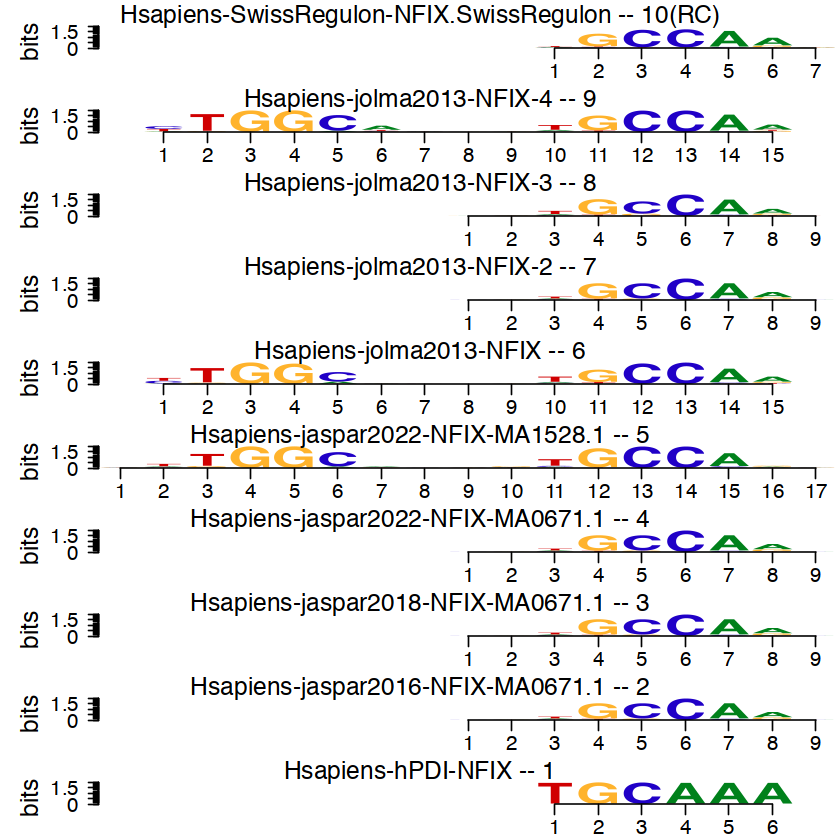

In [13]:
#NFIX
TF.gene = toupper( cluste2_3.DEG.TF$gene[1])
mat = subset (MotifDb, 
                        
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


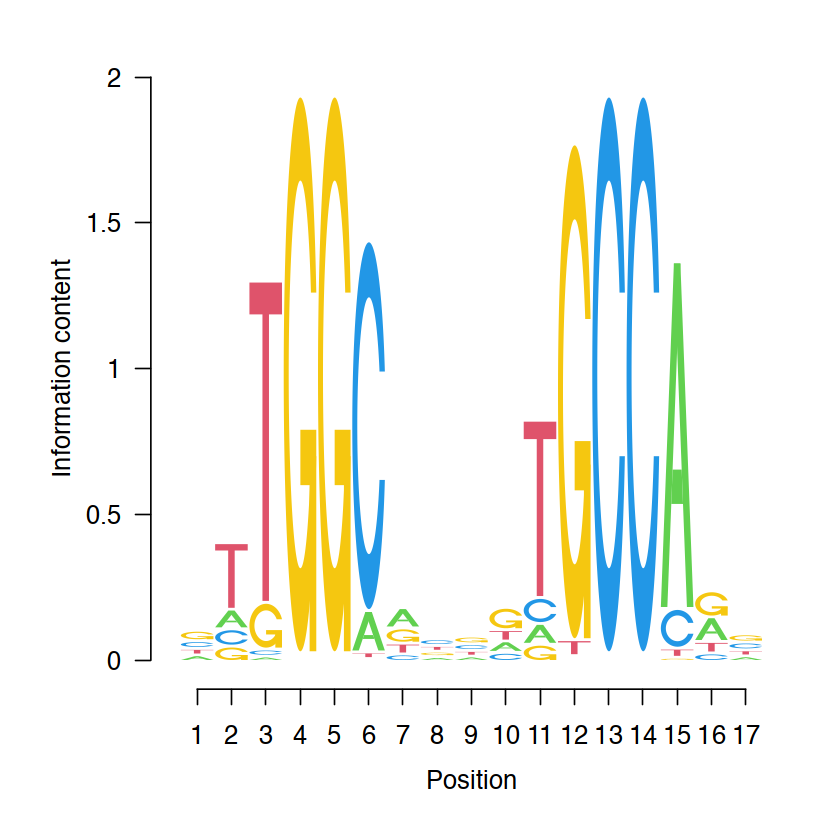

In [14]:
hits.tf <- findHits (TF.gene,pfm = mat[[5]],"85%" )
#nfiHitTest <- findHits (TF.gene,pfm = mat[[2]] )

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


ENTREZID gene    hits TF  
310 26927    Foxl2   1    NFIX
430 768252   Foxl2os 8    NFIX

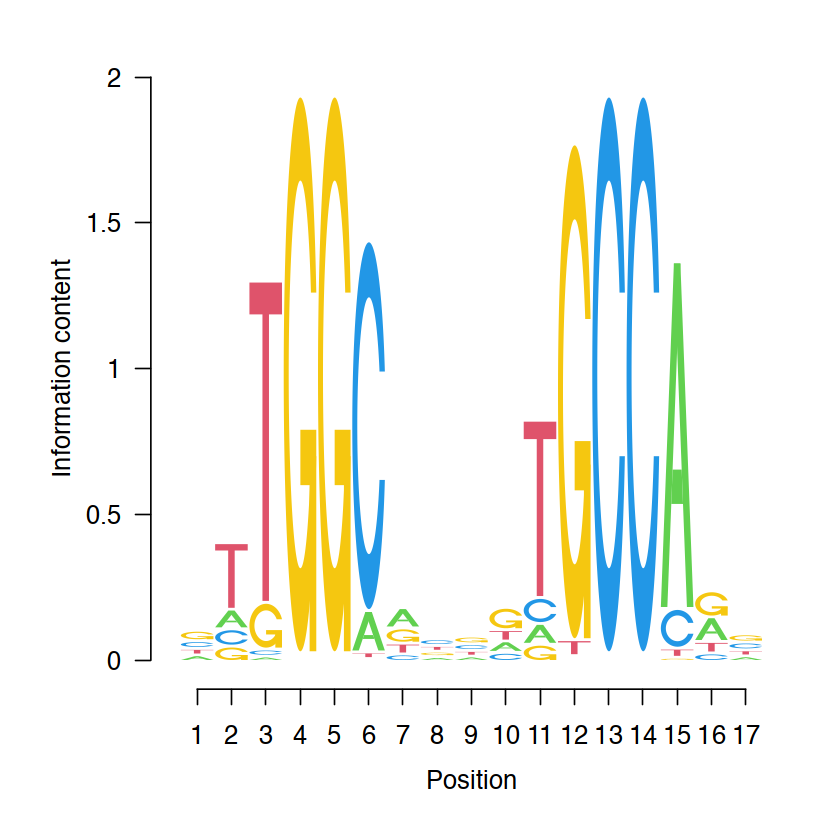

In [15]:
hits2.tf <- findHits (TF.gene,pfm = mat[[5]],"75%" )
hits2.tf[grep("Foxl2",hits2.tf$gene),]

In [16]:
hits.tf$source = "jaspar2022"
hits2.tf$source = "jaspar2022"
#### dataframe with TF hits 
TF.hits <- hits.tf
TF.hits <- rbind(TF.hits,hits2.tf[grep("Foxl2",hits2.tf$gene),] )
TF.hits

ENTREZID gene     hits TF   source    
1   102414   Clk3      2   NFIX jaspar2022
2   109095   Rbm15b    1   NFIX jaspar2022
3   114255   Dok4      8   NFIX jaspar2022
4   114886   Cygb      1   NFIX jaspar2022
5   11764    Ap1b1     2   NFIX jaspar2022
6   11980    Atp8a1    3   NFIX jaspar2022
7   12111    Bgn       1   NFIX jaspar2022
8   12385    Ctnna1    1   NFIX jaspar2022
9   12825    Col3a1    1   NFIX jaspar2022
10  13194    Ddb1      5   NFIX jaspar2022
11  13602    Sparcl1   1   NFIX jaspar2022
12  13649    Egfr      1   NFIX jaspar2022
13  140570   Plxnb2    1   NFIX jaspar2022
14  14457    Gas7      3   NFIX jaspar2022
15  14567    Gdi1      3   NFIX jaspar2022
16  14955    H19       7   NFIX jaspar2022
17  16002    Igf2      4   NFIX jaspar2022
18  16480    Jup       3   NFIX jaspar2022
19  16568    Kif3a     6   NFIX jaspar2022
20  16668    Krt18     1   NFIX jaspar2022
21  16905    Lmna      2   NFIX jaspar2022
22  17188    Maz       5   NFIX jaspar2022
23  17263    Meg3      2   NFIX jaspar2022
24  17294    Mest      2   NFIX jaspar2022
25  17536    Meis2     8   NFIX jaspar2022
26  18027    Nfia      5   NFIX jaspar2022
27  18082    Nipsnap1  1   NFIX jaspar2022
28  18111    Nnat     10   NFIX jaspar2022
29  18616    Peg3      1   NFIX jaspar2022
30  18641    Pfkl      1   NFIX jaspar2022
⋮   ⋮        ⋮        ⋮    ⋮    ⋮         
43  22088    Tsg101   4    NFIX jaspar2022
44  225115   Svil     1    NFIX jaspar2022
45  227743   Mapkap1  1    NFIX jaspar2022
46  231470   Fras1    2    NFIX jaspar2022
47  232288   Frmd4b   2    NFIX jaspar2022
48  237979   Sdk2     4    NFIX jaspar2022
49  23942    Mta2     2    NFIX jaspar2022
50  239528   Ago2     1    NFIX jaspar2022
51  240396   Mex3c    1    NFIX jaspar2022
52  268977   Ltbp1    3    NFIX jaspar2022
53  27223    Trp53bp1 7    NFIX jaspar2022
54  319939   Tns3     1    NFIX jaspar2022
55  320183   Msrb3    1    NFIX jaspar2022
56  382034   Gse1     1    NFIX jaspar2022
57  56188    Fxyd1    4    NFIX jaspar2022
58  56428    Mtch2    6    NFIX jaspar2022
59  63959    Slc29a1  1    NFIX jaspar2022
60  66395    Ahnak    1    NFIX jaspar2022
61  67393    Cxxc5    2    NFIX jaspar2022
62  70885    Ints10   1    NFIX jaspar2022
63  72475    Ssbp3    3    NFIX jaspar2022
64  735280   Mir675   1    NFIX jaspar2022
65  74493    Tnks2    2    NFIX jaspar2022
66  77579    Myh10    1    NFIX jaspar2022
67  77809    Lrrc42   1    NFIX jaspar2022
68  81018    Rnf114   1    NFIX jaspar2022
69  83797    Smarcd1  5    NFIX jaspar2022
70  93762    Smarca5  2    NFIX jaspar2022
310 26927    Foxl2    1    NFIX jaspar2022
430 768252   Foxl2os  8    NFIX jaspar2022

[1] "Tcf21"
[1] 1
[1] "Tcf21"


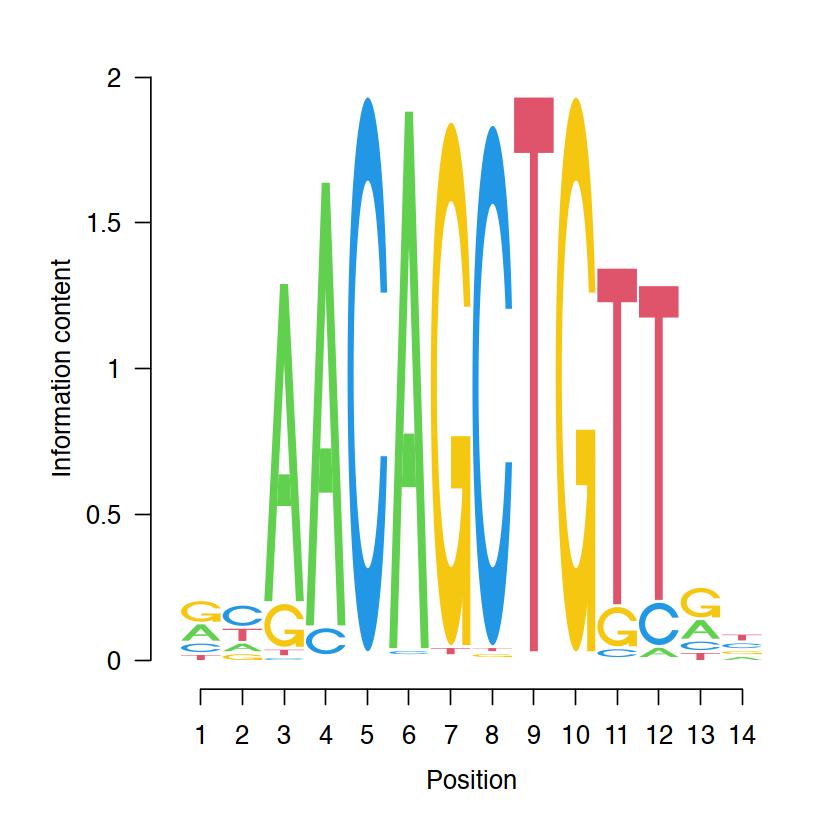

In [17]:
### Tcf21
TF.gene = cluste2_3.DEG.TF$gene[2]
mat = subset (MotifDb, organism=='Mmusculus' & 
                        dataSource=='jaspar2022' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 72  5

[1] 437   5

ENTREZID gene   hits TF   source    
1 102414   Clk3   2    NFIX jaspar2022
2 109095   Rbm15b 1    NFIX jaspar2022
3 114255   Dok4   8    NFIX jaspar2022
4 114886   Cygb   1    NFIX jaspar2022
5 11764    Ap1b1  2    NFIX jaspar2022
6 11980    Atp8a1 3    NFIX jaspar2022

[1] 509   5

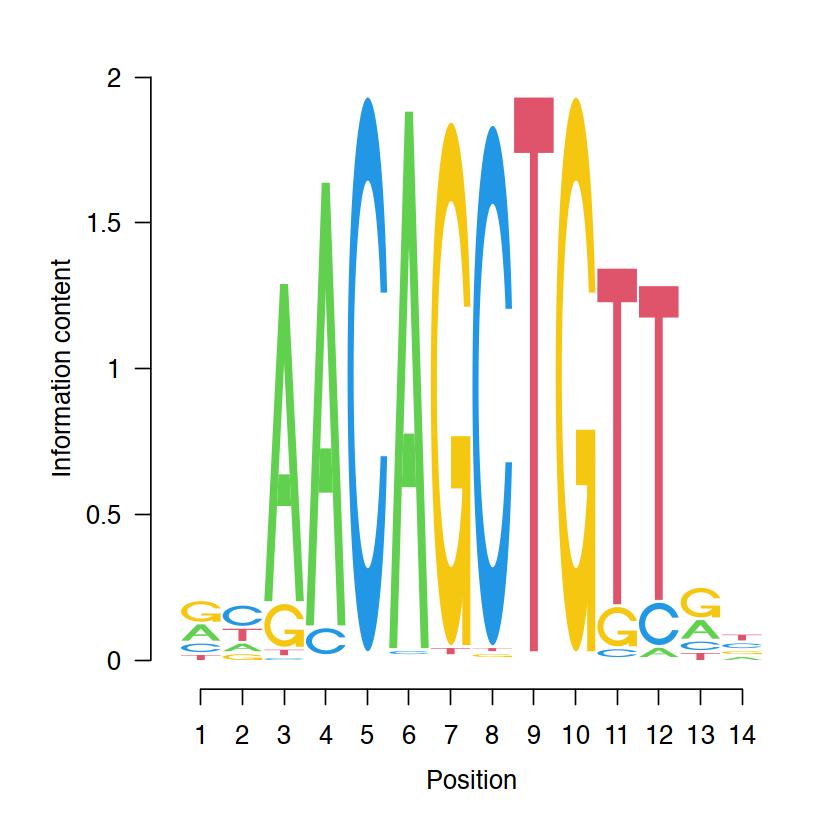

In [18]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"75%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
head(TF.hits)
dim(TF.hits)

[1] "MGP"
[1] 1
[1] "MGP"


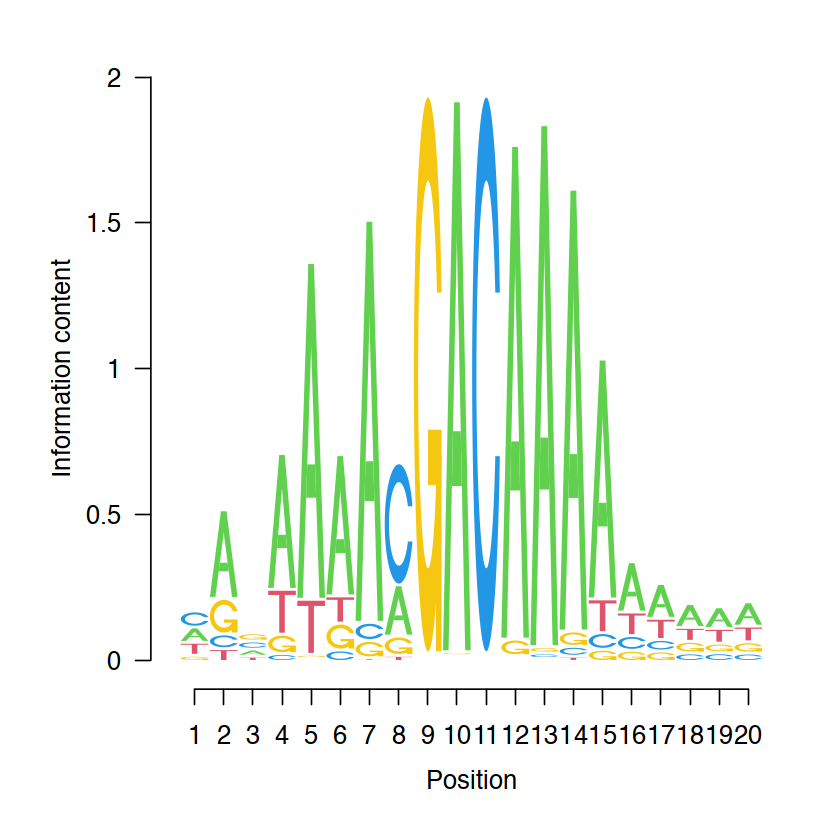

In [19]:
#Mgp
TF.gene = toupper( cluste2_3.DEG.TF$gene[3])
mat = subset (MotifDb, 
                        dataSource=='jaspar2022' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)


Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 509   5

[1] 95  5

[1] 604   5

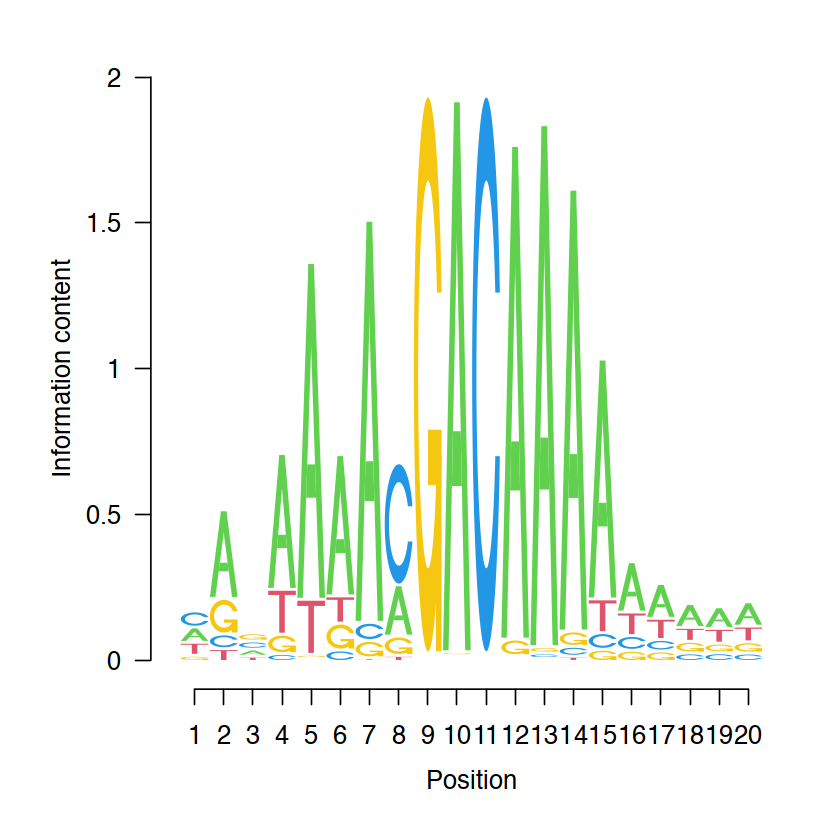

In [20]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "MYLK"
[1] 1
[1] "MYLK"


MotifDb object of length 1
| Created from downloaded public sources, last update: 2022-Mar-04
| 1 position frequency matrices from 1 source:
|               hPDI:    1
| 1 organism/s
|           Hsapiens:    1
Hsapiens-hPDI-MYLK 

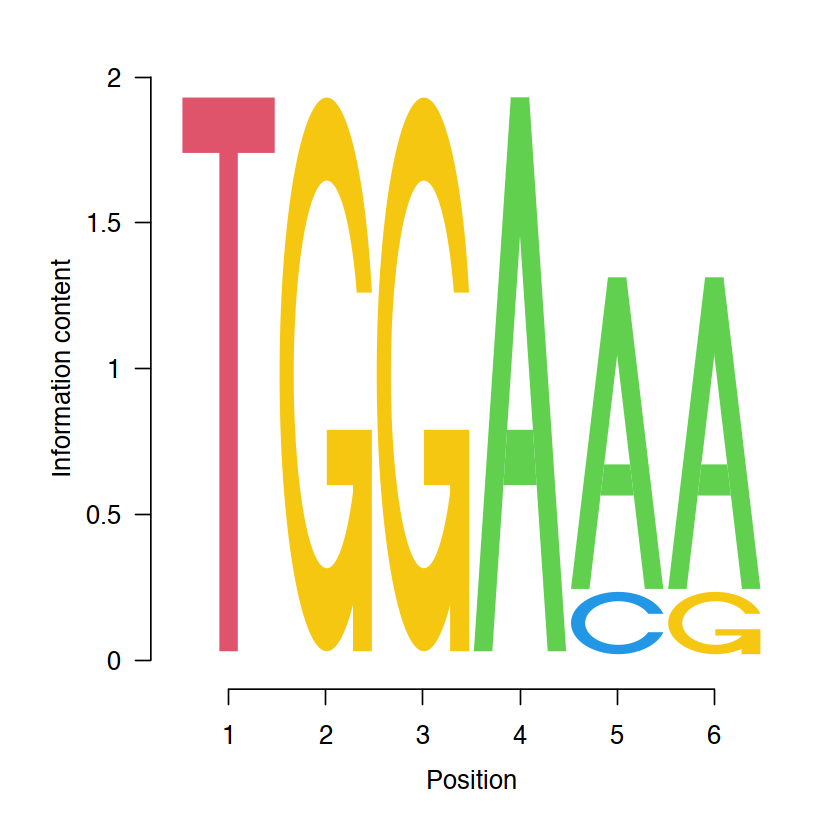

In [21]:
#
TF.gene = toupper( cluste2_3.DEG.TF$gene[4])
mat = subset (MotifDb, 
                         geneSymbol==TF.gene)
plotAllMotif(TF.gene)
mat

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 604   5

[1] 478   5

[1] 1082    5

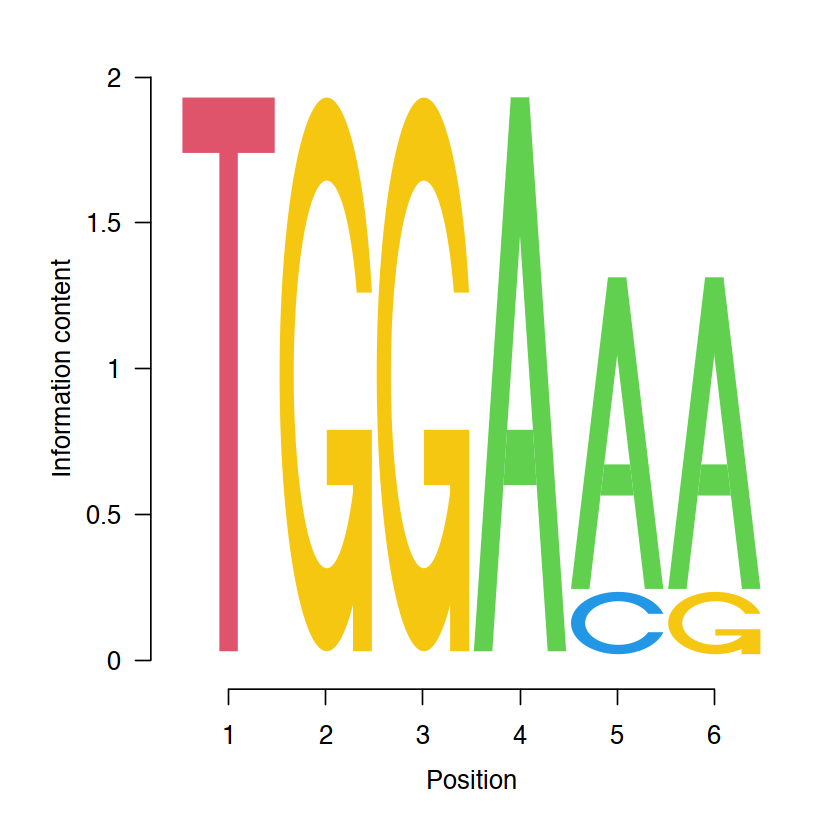

In [22]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "hPDI"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "Ar"
[1] 1
[1] "Ar"


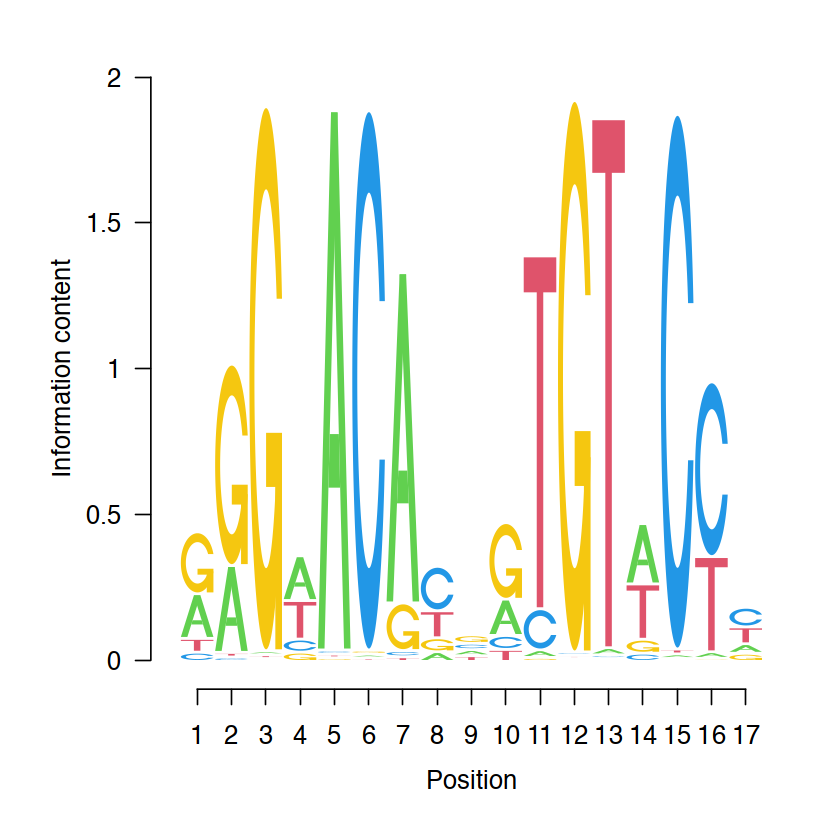

In [23]:
#Ar
TF.gene = cluste2_3.DEG.TF$gene[5]
mat = subset (MotifDb, organism=='Mmusculus' & 
                        dataSource=='jaspar2022' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 1082    5

[1] 22  5

[1] 1104    5

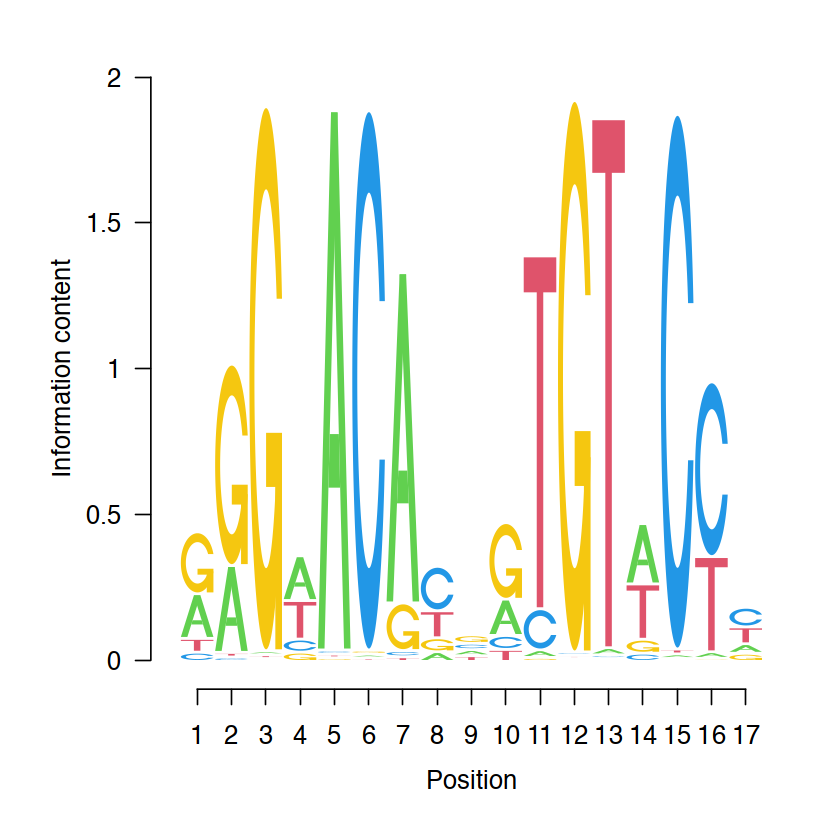

In [24]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "Foxl2"
[1] 1
[1] "Foxl2"


MotifDb object of length 1
| Created from downloaded public sources, last update: 2022-Mar-04
| 1 position frequency matrices from 1 source:
|         jaspar2022:    1
| 1 organism/s
|          Mmusculus:    1
Mmusculus-jaspar2022-Foxl2-MA1607.1 

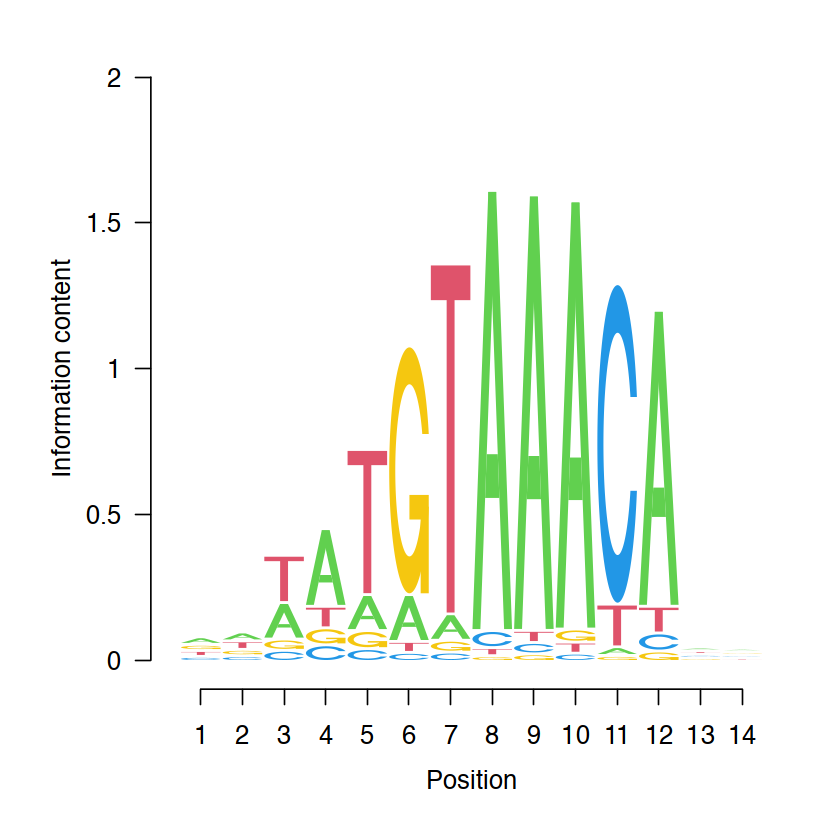

In [25]:
TF.gene = cluste2_3.DEG.TF$gene[6]
mat = subset (MotifDb, organism=='Mmusculus' & 
                        dataSource=='jaspar2022' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)
mat

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 1104    5

[1] 293   5

[1] 1397    5

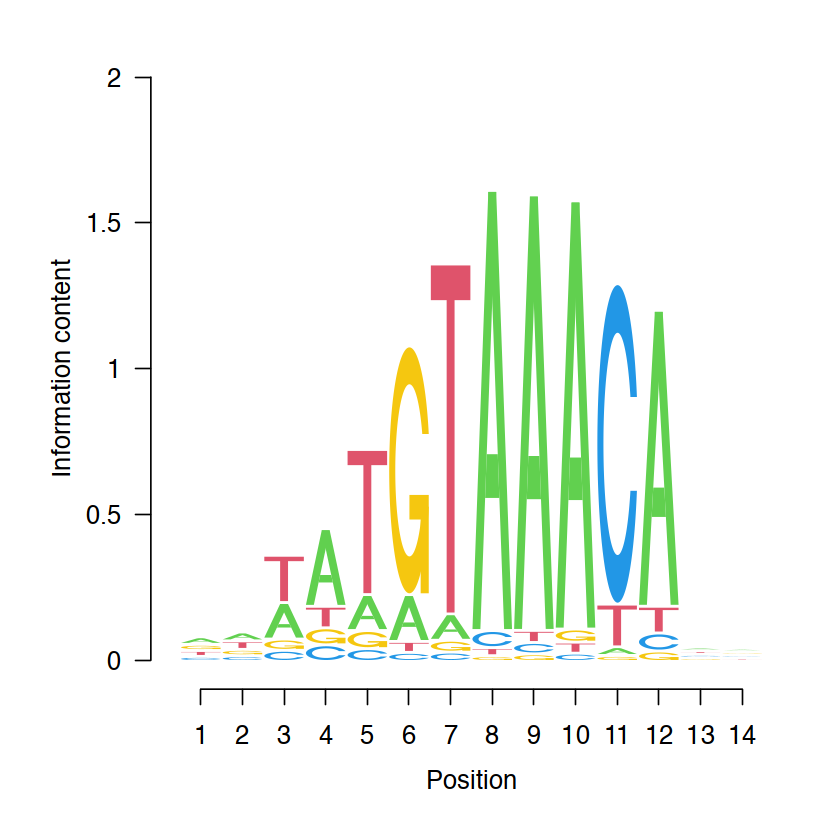

In [26]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "CREB3L1"
[1] 1
[1] "CREB3L1"


MotifDb object of length 1
| Created from downloaded public sources, last update: 2022-Mar-04
| 1 position frequency matrices from 1 source:
|         jaspar2022:    1
| 1 organism/s
|           Hsapiens:    1
Hsapiens-jaspar2022-CREB3L1-MA0839.1 

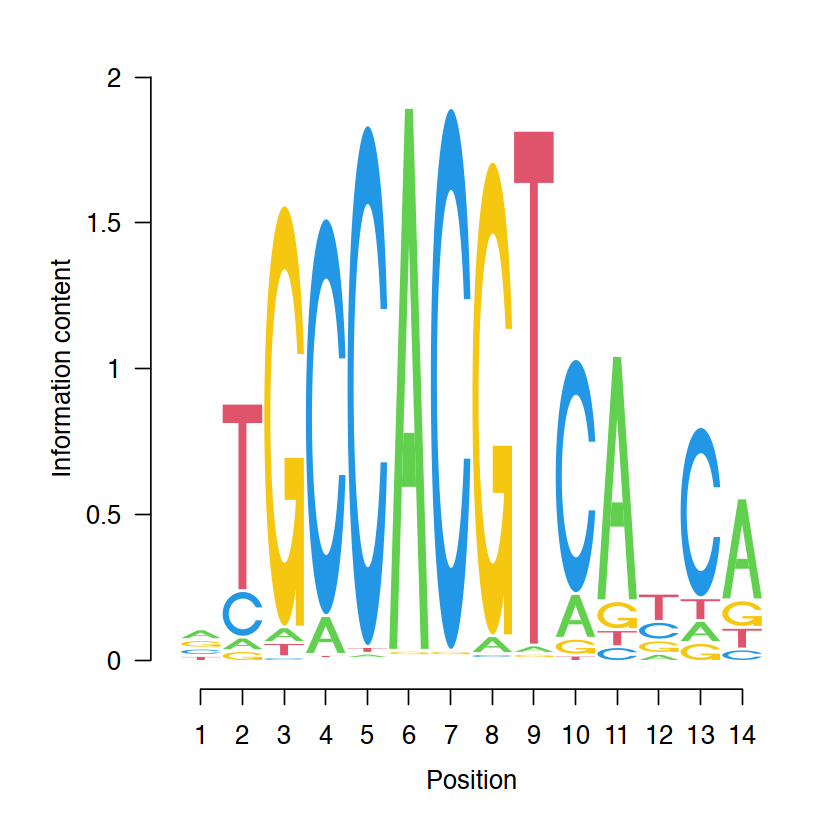

In [27]:
TF.gene = toupper( cluste2_3.DEG.TF$gene[7])
mat = subset (MotifDb, 
                        dataSource=='jaspar2022' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)
mat

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 1397    5

[1] 14  5

[1] 1411    5

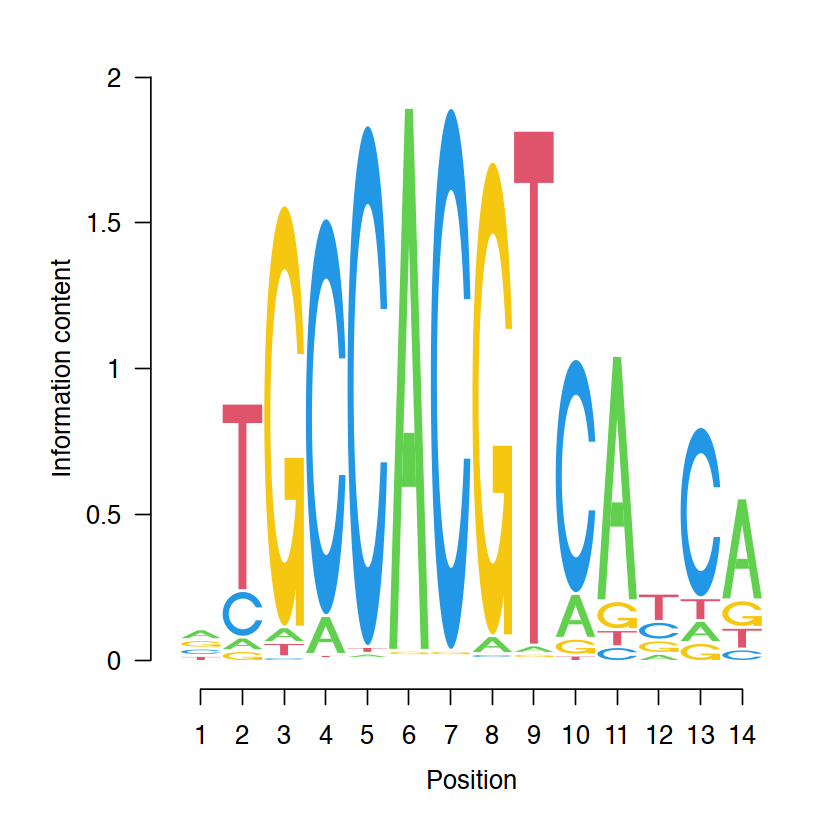

In [28]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "NFIA"
[1] 2


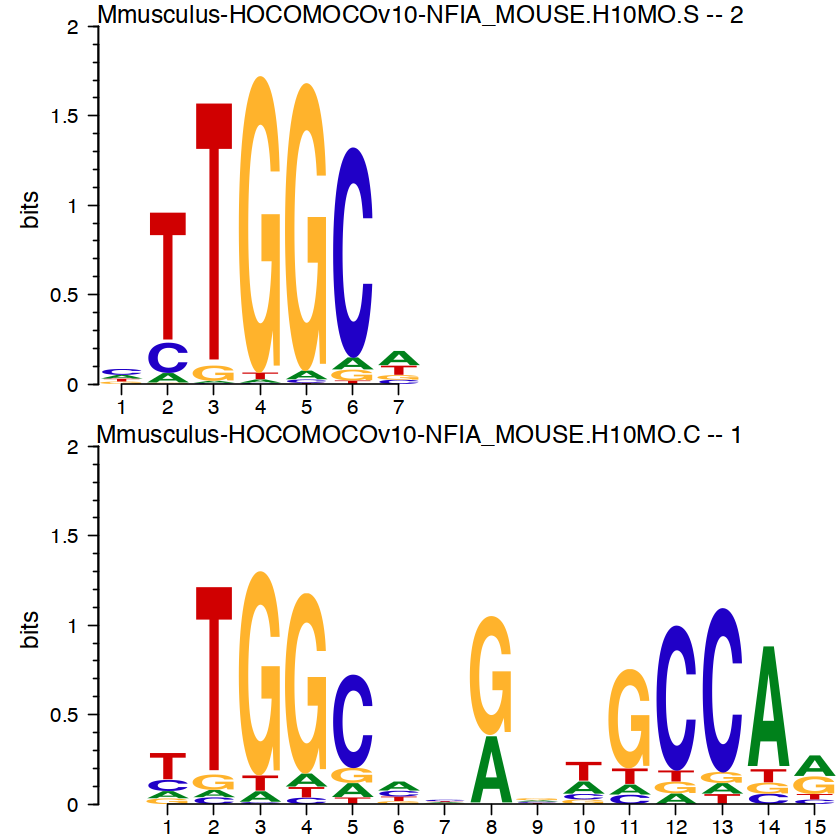

In [29]:
#NFIA
TF.gene = toupper( cluste2_3.DEG.TF$gene[8])
mat = subset (MotifDb, 
                        organism=='Mmusculus' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)


Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 1411    5

[1] 117   5

[1] 1528    5

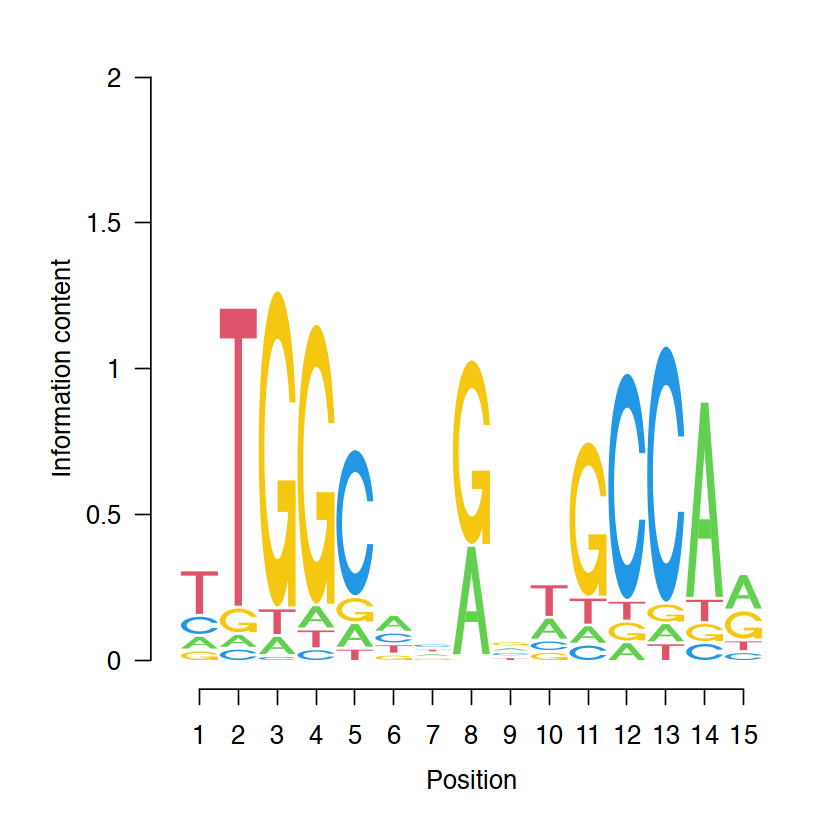

In [30]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "HOCOMOCOV10"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "ZEB1"
[1] 1
[1] "ZEB1"


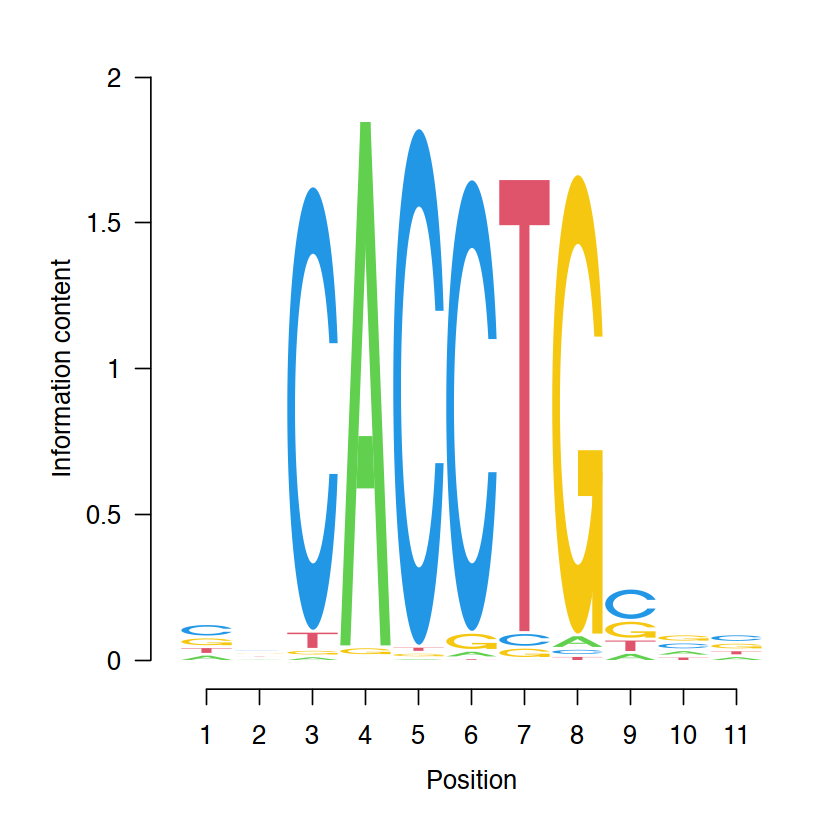

In [31]:
TF.gene = toupper( cluste2_3.DEG.TF$gene[9])
mat = subset (MotifDb, 
                        dataSource=='jaspar2022' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)


Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 1528    5

[1] 447   5

[1] 1975    5

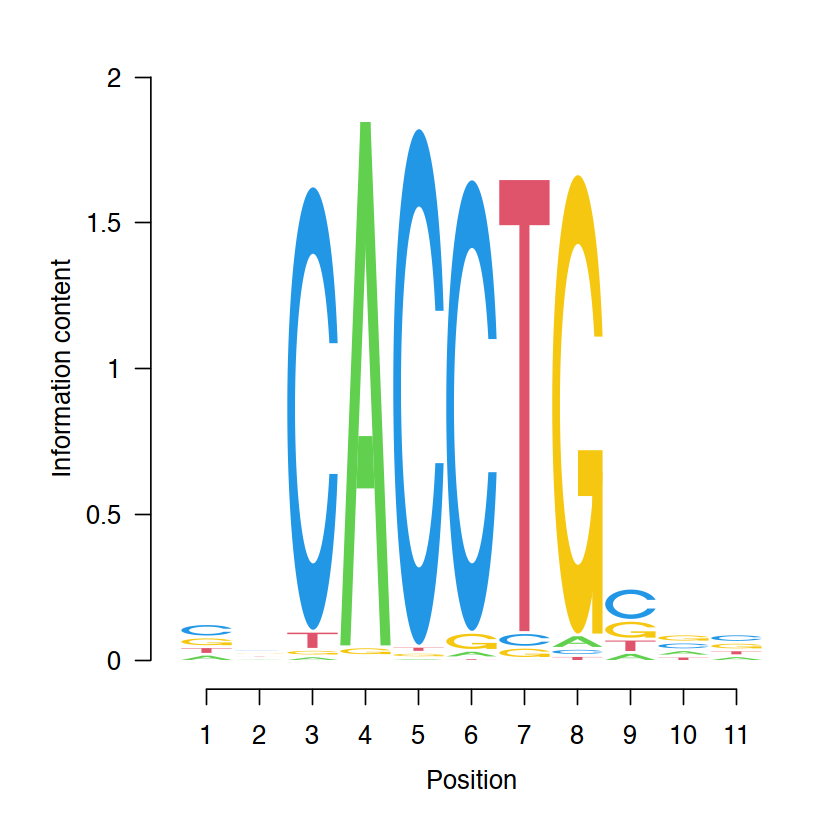

In [32]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "NR6A1"
[1] 1
[1] "NR6A1"


MotifDb object of length 1
| Created from downloaded public sources, last update: 2022-Mar-04
| 1 position frequency matrices from 1 source:
|        HOCOMOCOv10:    1
| 1 organism/s
|          Mmusculus:    1
Mmusculus-HOCOMOCOv10-NR6A1_MOUSE.H10MO.B 

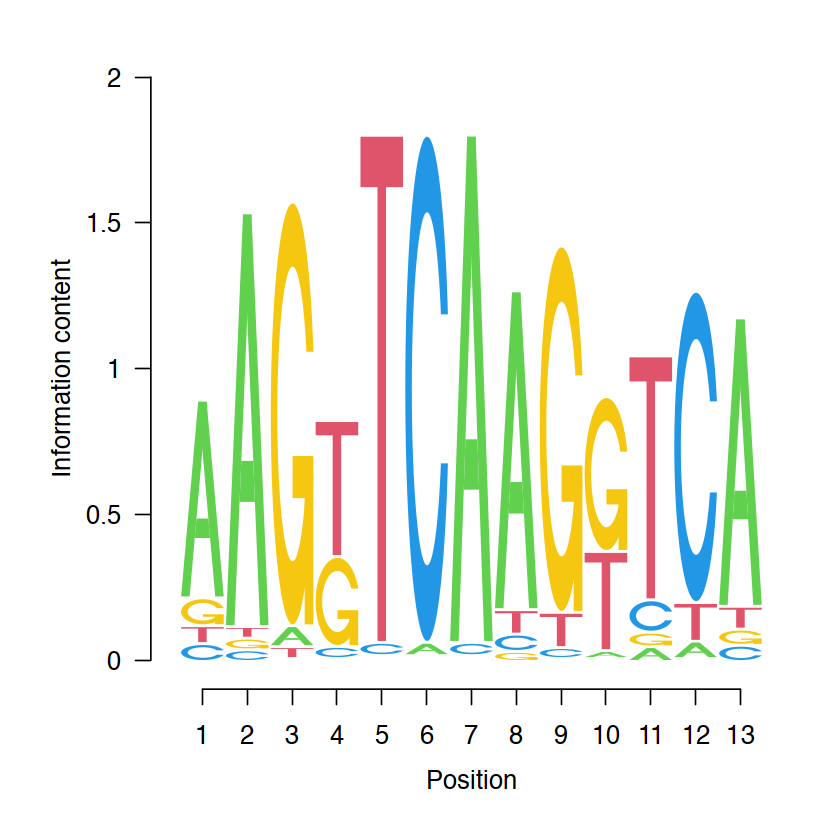

In [33]:
TF.gene = toupper( cluste2_3.DEG.TF$gene[10])
mat = subset (MotifDb, 
                        organism=='Mmusculus' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)
mat

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 1975    5

[1] 131   5

[1] 2106    5

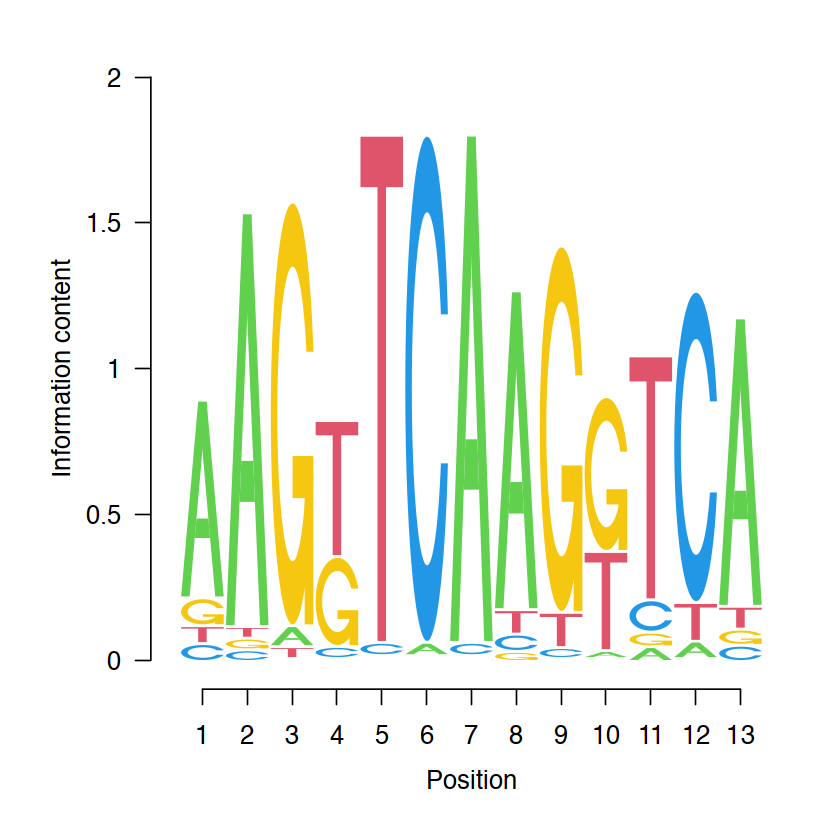

In [34]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "HOCOMOCOv10"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "NID1"
[1] 1
[1] "NID1"


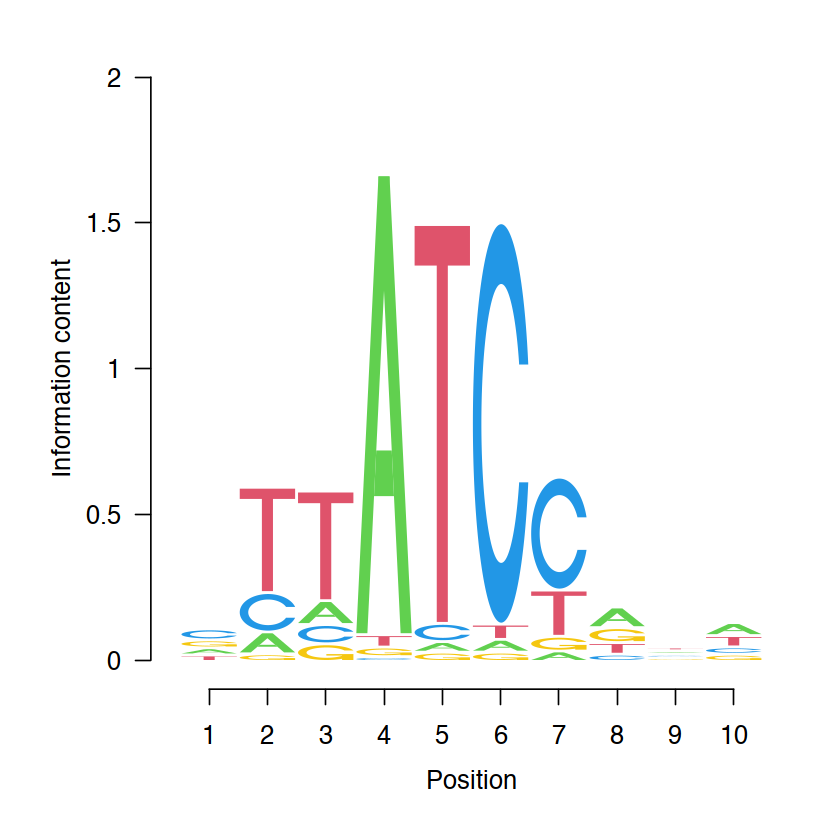

In [35]:
#NID1
TF.gene = toupper( cluste2_3.DEG.TF$gene[11])
mat = subset (MotifDb, 
                        dataSource=='jaspar2022' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)


Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 2106    5

[1] 448   5

[1] 2554    5

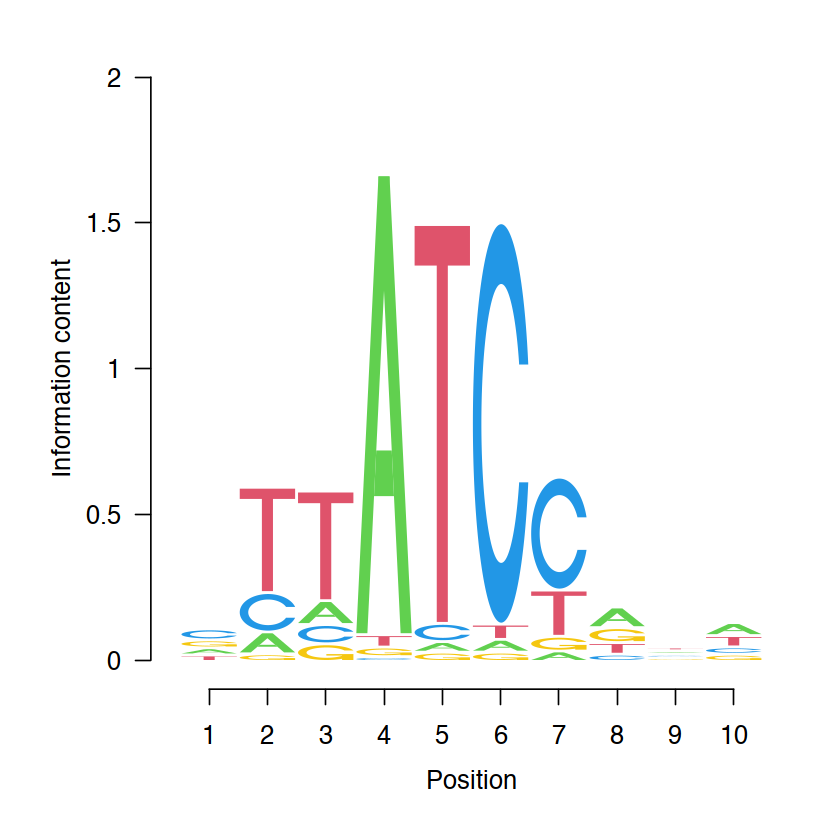

In [36]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "ESR1"
[1] 1
[1] "ESR1"


MotifDb object of length 1
| Created from downloaded public sources, last update: 2022-Mar-04
| 1 position frequency matrices from 1 source:
|        HOCOMOCOv10:    1
| 1 organism/s
|          Mmusculus:    1
Mmusculus-HOCOMOCOv10-ESR1_MOUSE.H10MO.B 

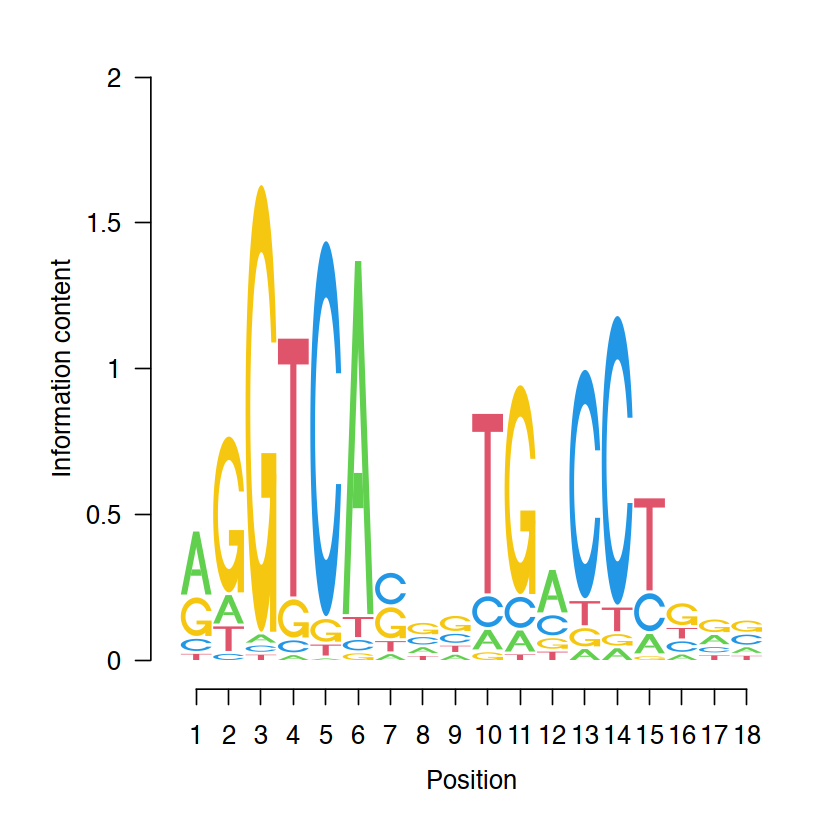

In [37]:
#ESR1
TF.gene = toupper( cluste2_3.DEG.TF$gene[12])
mat = subset (MotifDb, 
                         organism=='Mmusculus' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)
mat

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 2554    5

[1] 39  5

[1] 2593    5

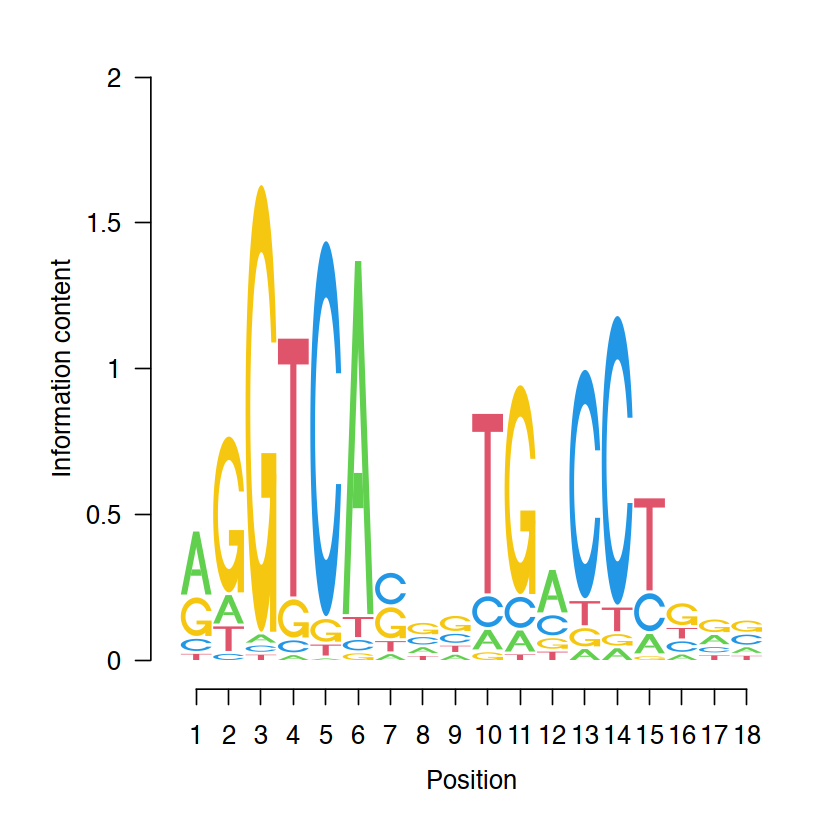

In [38]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "HOCOMOCOv10"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "THRA"
[1] 1
[1] "THRA"


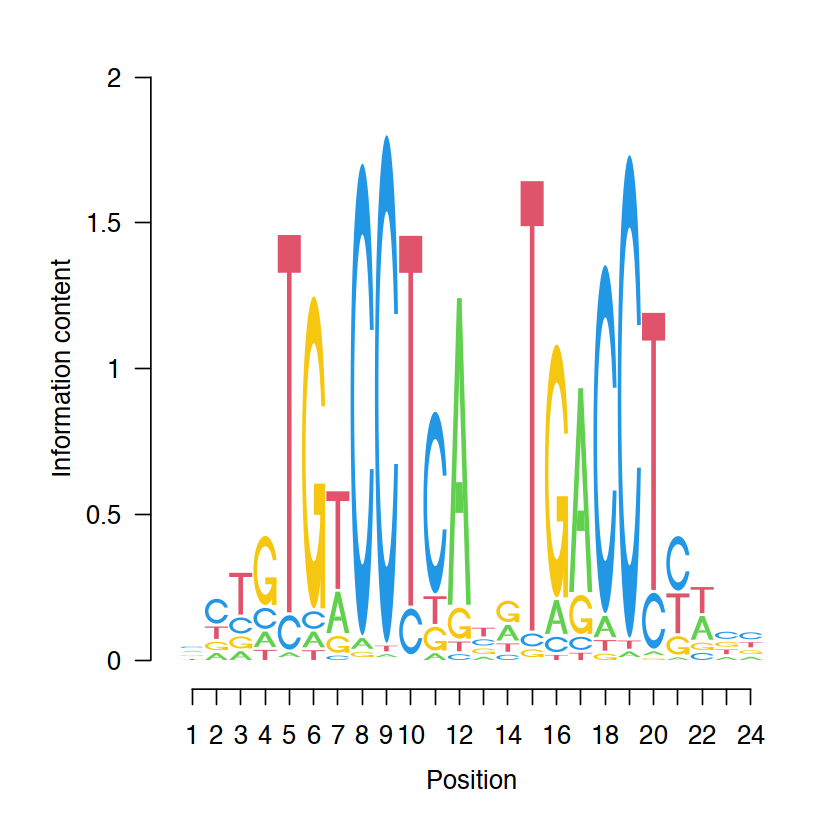

In [39]:
#THRA
TF.gene = toupper(cluste2_3.DEG.TF$gene[13])
mat = subset (MotifDb,  
                        dataSource=='jaspar2022' & 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)


Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 2593    5

[1] 1 5

[1] 2594    5

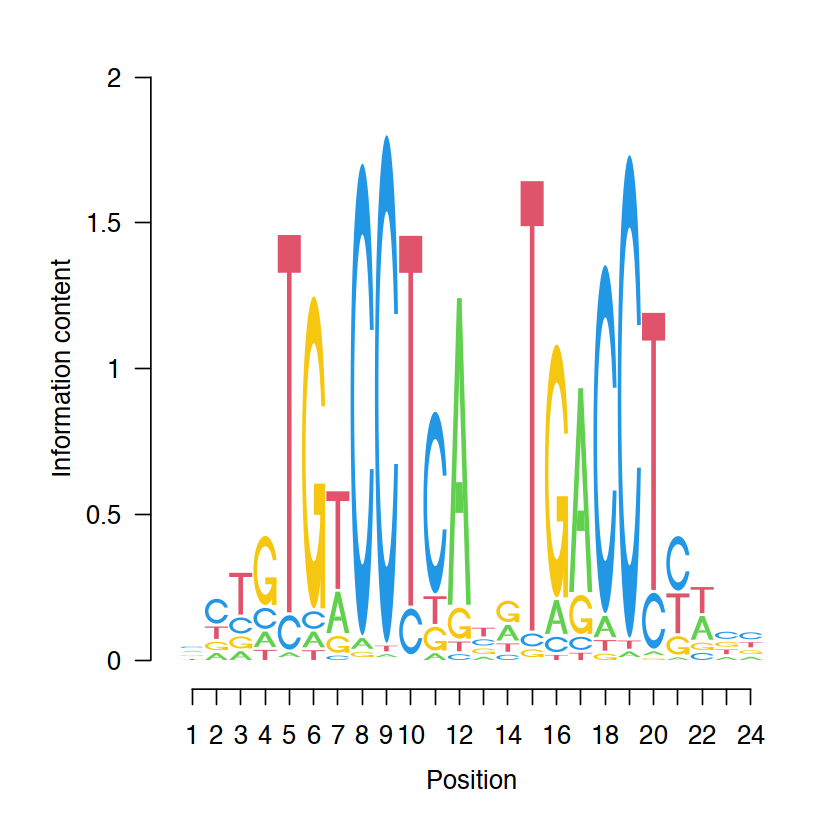

In [40]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "SwissRegulon"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "Sox5"
[1] 1
[1] "Sox5"


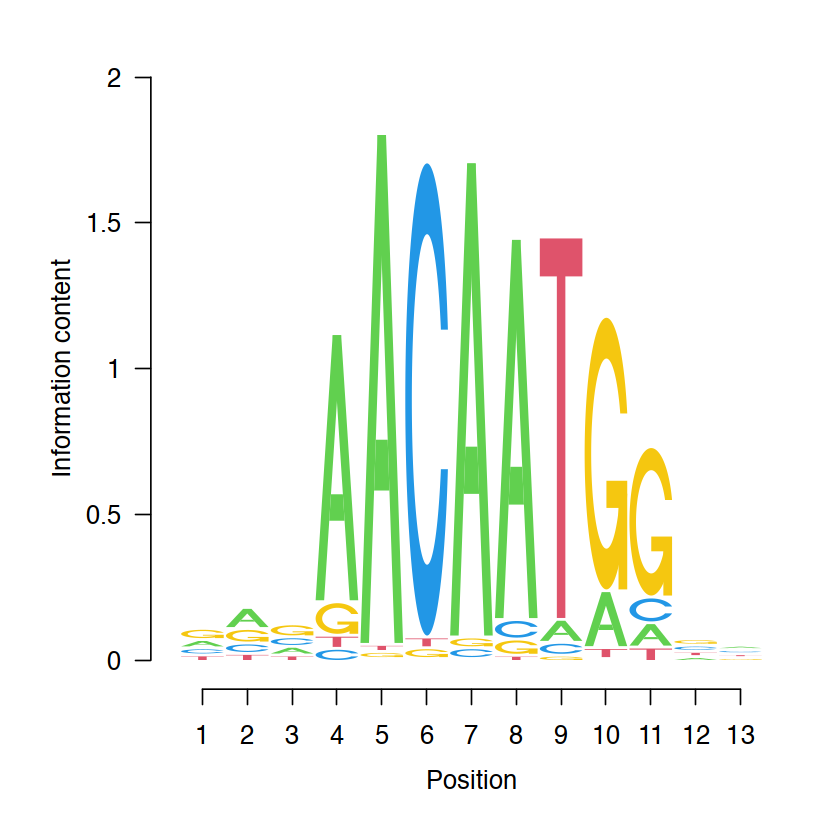

In [41]:
TF.gene = cluste2_3.DEG.TF$gene[14]
mat = subset (MotifDb, organism=='Mmusculus' & 
                        dataSource=='jaspar2022'&
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 2594    5

[1] 306   5

[1] 2900    5

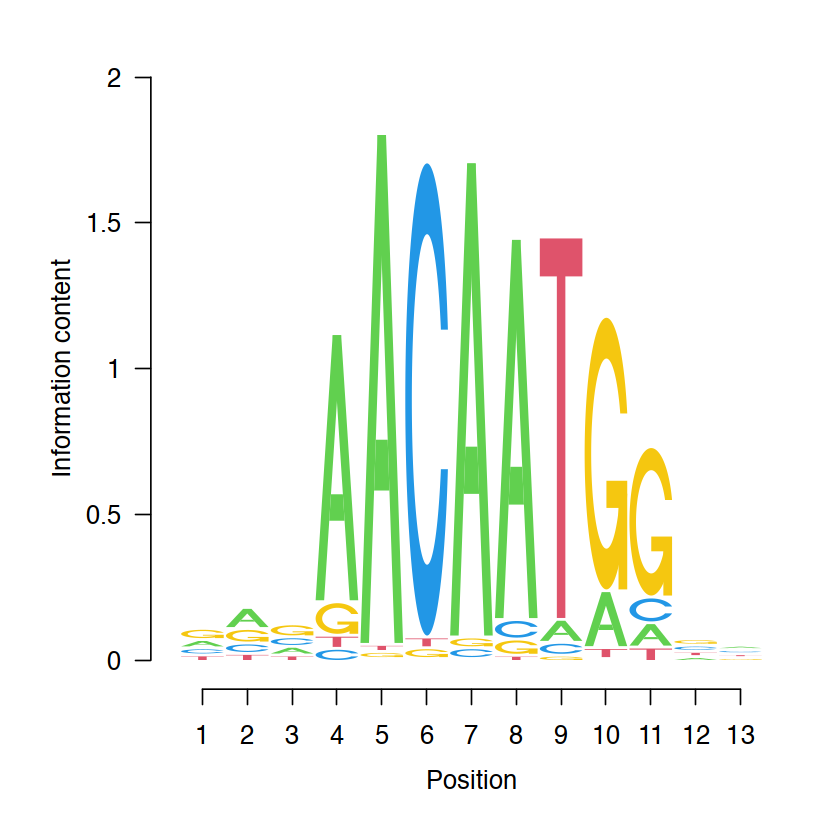

In [42]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "JUNB"
[1] 12


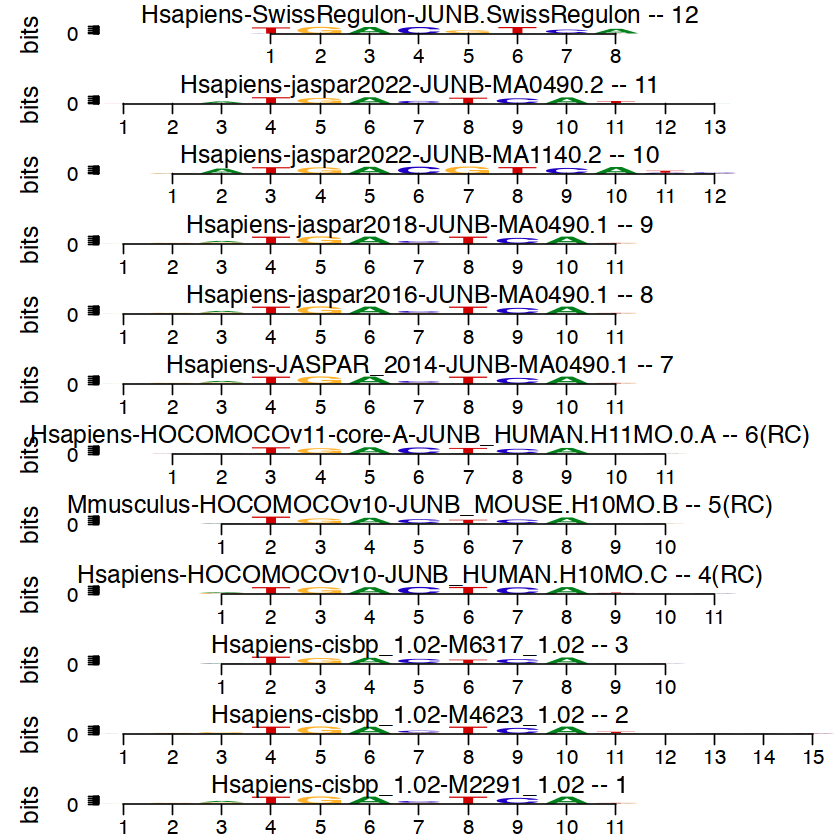

In [43]:
TF.gene = toupper( cluste2_3.DEG.TF$gene[15])
mat = subset (MotifDb, 
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 2900    5

[1] 436   5

[1] 3336    5

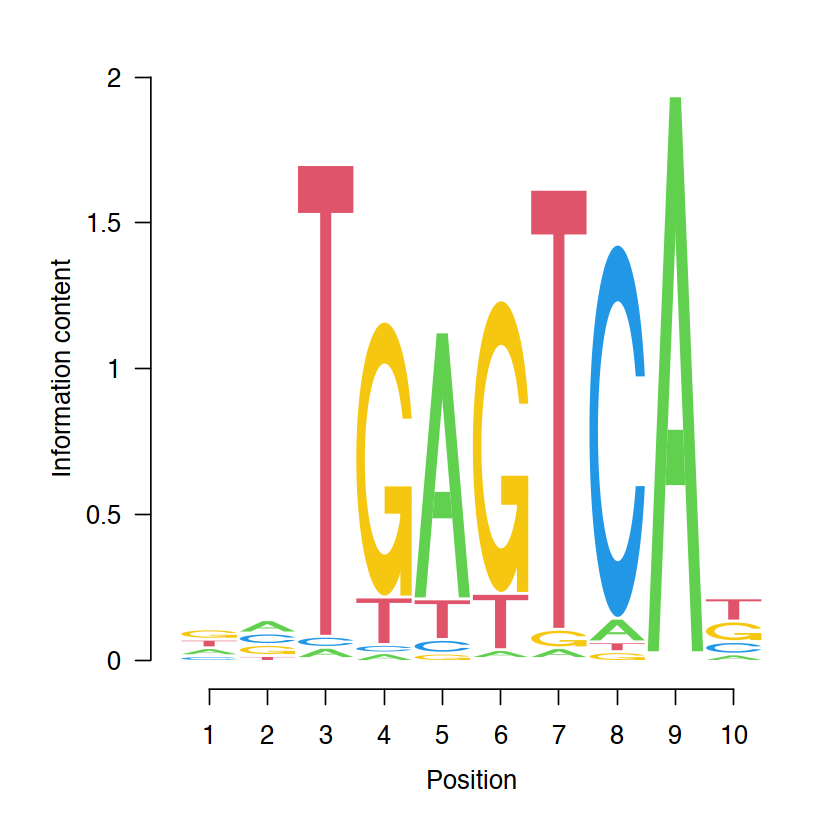

In [44]:
hits.tf <- findHits (TF.gene,pfm = mat[[5]],"85%" )
hits.tf$source = "hPDI"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "MSRB3"
[1] 1
[1] "MSRB3"


MotifDb object of length 1
| Created from downloaded public sources, last update: 2022-Mar-04
| 1 position frequency matrices from 1 source:
|               hPDI:    1
| 1 organism/s
|           Hsapiens:    1
Hsapiens-hPDI-MSRB3 

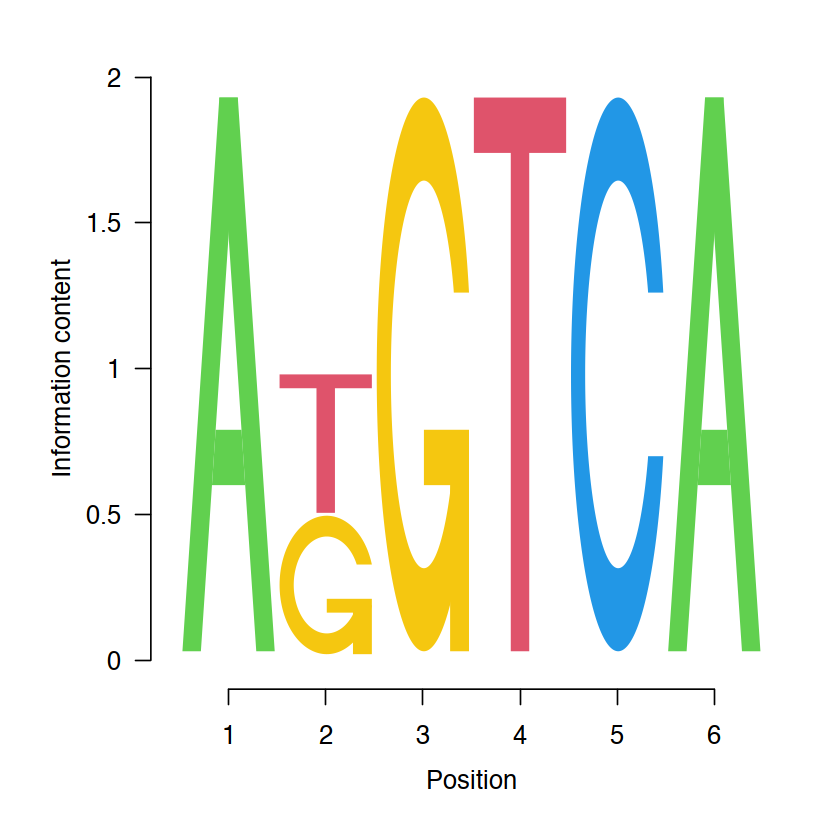

In [45]:
#MSRB3
TF.gene = toupper( cluste2_3.DEG.TF$gene[16])
mat = subset (MotifDb, 
                        
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)
mat

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 3336    5

[1] 473   5

[1] 3809    5

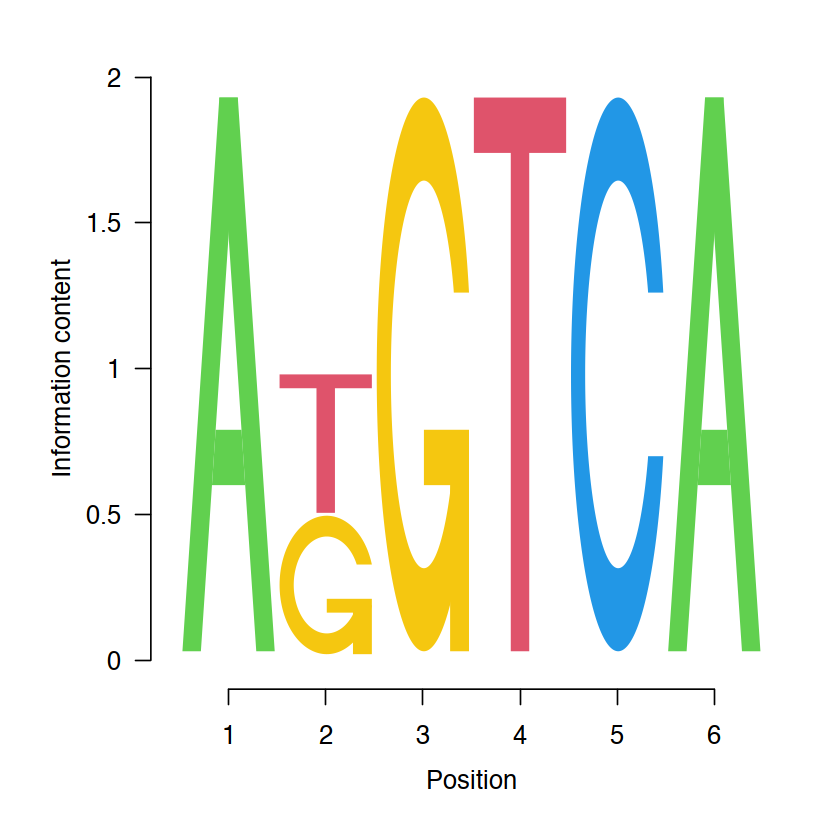

In [46]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "hPDI"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "TCF4"
[1] 1
[1] "TCF4"


MotifDb object of length 1
| Created from downloaded public sources, last update: 2022-Mar-04
| 1 position frequency matrices from 1 source:
|         jaspar2022:    1
| 1 organism/s
|           Hsapiens:    1
Hsapiens-jaspar2022-TCF4-MA0830.2 

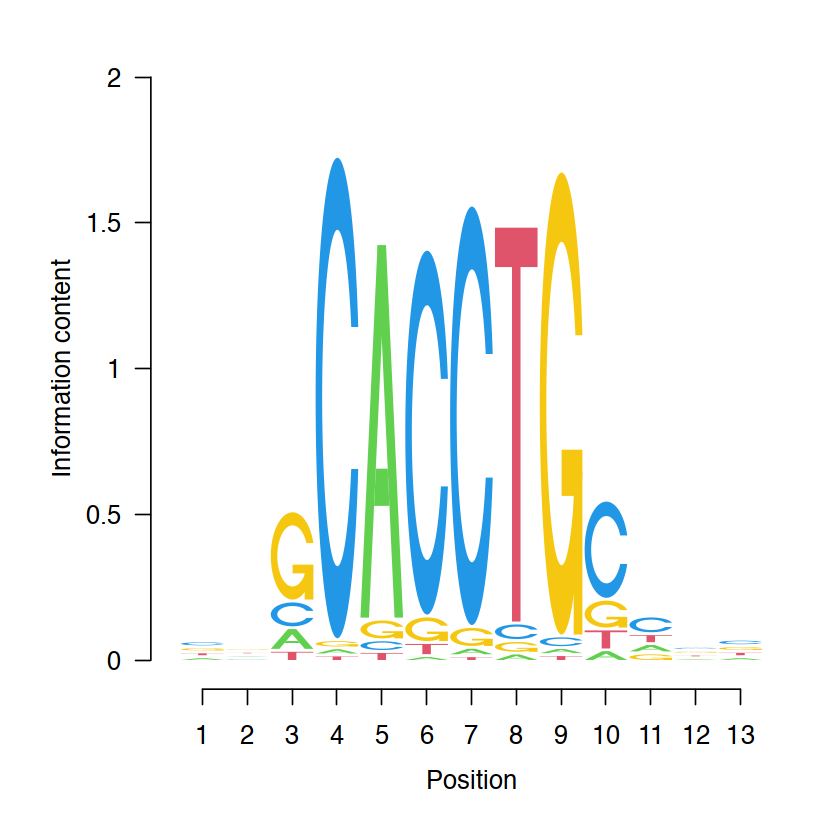

In [47]:
#MSRB3
TF.gene = toupper( cluste2_3.DEG.TF$gene[17])
mat = subset (MotifDb, 
                        dataSource=='jaspar2022'&
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)
mat

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 3809    5

[1] 413   5

[1] 4222    5

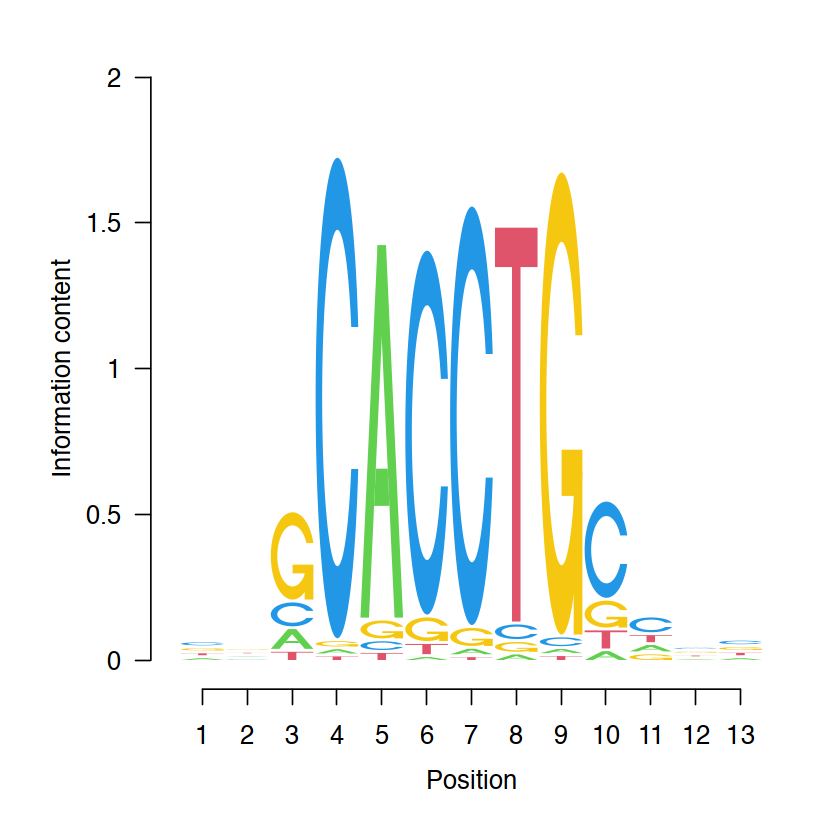

In [48]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

[1] "EGR1"
[1] 1
[1] "EGR1"


MotifDb object of length 1
| Created from downloaded public sources, last update: 2022-Mar-04
| 1 position frequency matrices from 1 source:
|         jaspar2022:    1
| 1 organism/s
|           Hsapiens:    1
Hsapiens-jaspar2022-EGR1-MA0162.4 

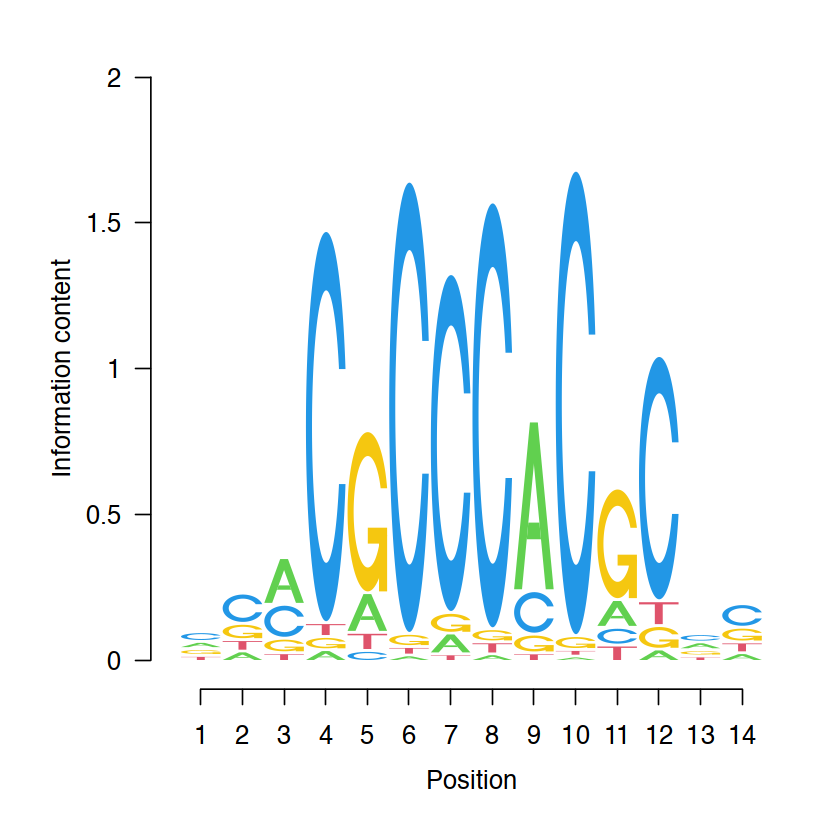

In [49]:
#MSRB3
TF.gene = toupper( cluste2_3.DEG.TF$gene[18])
mat = subset (MotifDb, 
                        dataSource=='jaspar2022'&
                        geneSymbol==TF.gene)
plotAllMotif(TF.gene)
mat

Warning message in .Call2("XString_match_PWM", pwm, subject, min.score, count.only, :
“'subject' contains letters not in [ACGT] ==> assigned weight 0 to them”


[1] 4222    5

[1] 216   5

[1] 4438    5

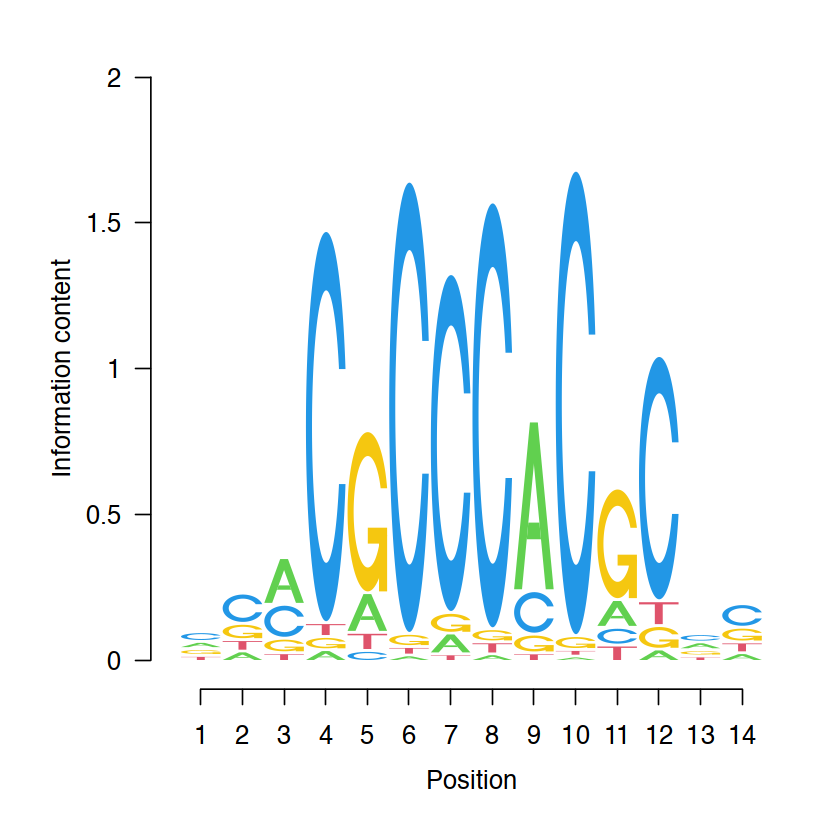

In [50]:
hits.tf <- findHits (TF.gene,pfm = mat[[1]],"85%" )
hits.tf$source = "jaspar2022"
#### dataframe with TF hits 
dim(TF.hits)
dim(hits.tf)
TF.hits <- rbind(TF.hits,hits.tf)
dim(TF.hits)

In [51]:
TF.hits$TF <- str_to_title (TF.hits$TF)

In [52]:
head(TF.hits)

ENTREZID gene   hits TF   source    
1 102414   Clk3   2    Nfix jaspar2022
2 109095   Rbm15b 1    Nfix jaspar2022
3 114255   Dok4   8    Nfix jaspar2022
4 114886   Cygb   1    Nfix jaspar2022
5 11764    Ap1b1  2    Nfix jaspar2022
6 11980    Atp8a1 3    Nfix jaspar2022

In [53]:
hitsGeneCsv <- function(gene) {
    
    hits.tmp <- TF.hits[TF.hits$TF == gene,]
    DEG.tmp <- cluste2_3.DEG[ cluste2_3.DEG$gene %in% TF.hits$gene,]
    hits.tmp <- merge(hits.tmp,DEG.tmp,by = "gene")
    write.csv(hits.tmp,paste("data/TF/",gene,"ovaryE11-P5-c2VS3-hits.csv"), row.names = FALSE)
}

In [54]:
lapply( cluste2_3.DEG.TF$gene, hitsGeneCsv)


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

In [55]:
write.csv(TF.hits,"data/ovaryE11-P5-TF.hits.csv", row.names = FALSE)
save(TF.hits, file = "data/ovaryE11-P5-TF.hits.Rdata")

In [56]:
head(TF.hits)

ENTREZID gene   hits TF   source    
1 102414   Clk3   2    Nfix jaspar2022
2 109095   Rbm15b 1    Nfix jaspar2022
3 114255   Dok4   8    Nfix jaspar2022
4 114886   Cygb   1    Nfix jaspar2022
5 11764    Ap1b1  2    Nfix jaspar2022
6 11980    Atp8a1 3    Nfix jaspar2022

<h1>NFIX HITS<h1>

In [57]:
NFIX.hist = TF.hits[TF.hits$TF == "Nfix","gene" ]
NFIX.hist

[1] "Clk3"     "Rbm15b"   "Dok4"     "Cygb"     "Ap1b1"    "Atp8a1"  
 [7] "Bgn"      "Ctnna1"   "Col3a1"   "Ddb1"     "Sparcl1"  "Egfr"    
[13] "Plxnb2"   "Gas7"     "Gdi1"     "H19"      "Igf2"     "Jup"     
[19] "Kif3a"    "Krt18"    "Lmna"     "Maz"      "Meg3"     "Mest"    
[25] "Meis2"    "Nfia"     "Nipsnap1" "Nnat"     "Peg3"     "Pfkl"    
[31] "Ptbp1"    "Smarca4"  "Sox9"     "Sparc"    "Serpine2" "Sptbn1"  
[37] "Stxbp2"   "Tcf4"     "Rassf2"   "Wdr18"    "Thra"     "Top1"    
[43] "Tsg101"   "Svil"     "Mapkap1"  "Fras1"    "Frmd4b"   "Sdk2"    
[49] "Mta2"     "Ago2"     "Mex3c"    "Ltbp1"    "Trp53bp1" "Tns3"    
[55] "Msrb3"    "Gse1"     "Fxyd1"    "Mtch2"    "Slc29a1"  "Ahnak"   
[61] "Cxxc5"    "Ints10"   "Ssbp3"    "Mir675"   "Tnks2"    "Myh10"   
[67] "Lrrc42"   "Rnf114"   "Smarcd1"  "Smarca5"  "Foxl2"    "Foxl2os"

In [58]:
NFIX.hist <- cluste2_3.DEG[cluste2_3.DEG$gene %in% NFIX.hist,]
NFIX.hist.up <- NFIX.hist[NFIX.hist$dir == "up",]
NFIX.hist.down <- NFIX.hist[NFIX.hist$dir == "down",]

In [59]:
NFIX.hist.up

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster dir gene    
Sparcl1  1.047404e-14 0.8879360  0.968 0.612 4.540076e-10 3       up  Sparcl1 
Foxl2    1.480049e-13 0.9394269  0.495 0.020 6.415418e-09 3       up  Foxl2   
Bgn      3.307673e-13 0.8121150  0.946 0.582 1.433744e-08 3       up  Bgn     
Sparc    5.901869e-13 0.4109303  1.000 0.990 2.558224e-08 3       up  Sparc   
Cygb     1.032181e-12 1.1744372  0.677 0.214 4.474093e-08 3       up  Cygb    
Sptbn1   3.355284e-12 0.4974765  0.989 0.939 1.454382e-07 3       up  Sptbn1  
Foxl2os  3.805943e-11 0.6007636  0.452 0.041 1.649724e-06 3       up  Foxl2os 
Slc29a1  1.258645e-10 1.1836735  0.581 0.173 5.455722e-06 3       up  Slc29a1 
Col3a1   3.094565e-10 0.5163004  0.989 0.867 1.341370e-05 3       up  Col3a1  
Rassf2   6.219299e-10 0.5740662  0.548 0.133 2.695817e-05 3       up  Rassf2  
Ahnak    3.828160e-09 0.5845886  0.871 0.612 1.659354e-04 3       up  Ahnak   
Nfia     9.824758e-09 0.2926275  1.000 0.939 4.258640e-04 3       up  Nfia    
Fxyd1    4.550253e-07 0.7478549  0.613 0.265 1.972353e-02 3       up  Fxyd1   
Thra     3.271217e-06 0.6654886  0.645 0.327 1.417942e-01 3       up  Thra    
Lmna     6.358492e-06 0.6021618  0.731 0.520 2.756152e-01 3       up  Lmna    
Svil     1.608495e-05 0.5130336  0.677 0.408 6.972182e-01 3       up  Svil    
Msrb3    2.143170e-05 0.6869551  0.430 0.173 9.289784e-01 3       up  Msrb3   
Egfr     3.040046e-05 0.3612213  0.462 0.163 1.000000e+00 3       up  Egfr    
Serpine2 3.798624e-05 0.4998797  0.667 0.367 1.000000e+00 3       up  Serpine2
Tcf4     4.472129e-05 0.2928338  0.968 0.918 1.000000e+00 3       up  Tcf4    
Gas7     5.100550e-05 0.3874560  0.548 0.276 1.000000e+00 3       up  Gas7    
         TF 
Sparcl1  no 
Foxl2    yes
Bgn      no 
Sparc    no 
Cygb     no 
Sptbn1   no 
Foxl2os  no 
Slc29a1  no 
Col3a1   no 
Rassf2   no 
Ahnak    no 
Nfia     yes
Fxyd1    no 
Thra     yes
Lmna     no 
Svil     no 
Msrb3    yes
Egfr     no 
Serpine2 no 
Tcf4     yes
Gas7     no

In [60]:
library(org.Mm.eg.db)
library(AnnotationDbi)
library("clusterProfiler")

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:igraph’:

    simplify


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




In [61]:
head(NFIX.hist.up)
head(NFIX.hist.down)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster dir gene   
Sparcl1 1.047404e-14 0.8879360  0.968 0.612 4.540076e-10 3       up  Sparcl1
Foxl2   1.480049e-13 0.9394269  0.495 0.020 6.415418e-09 3       up  Foxl2  
Bgn     3.307673e-13 0.8121150  0.946 0.582 1.433744e-08 3       up  Bgn    
Sparc   5.901869e-13 0.4109303  1.000 0.990 2.558224e-08 3       up  Sparc  
Cygb    1.032181e-12 1.1744372  0.677 0.214 4.474093e-08 3       up  Cygb   
Sptbn1  3.355284e-12 0.4974765  0.989 0.939 1.454382e-07 3       up  Sptbn1 
        TF 
Sparcl1 no 
Foxl2   yes
Bgn     no 
Sparc   no 
Cygb    no 
Sptbn1  no

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster dir  gene  TF 
Igf2  7.840824e-20 -0.9335000 0.484 0.949 3.398683e-15 3       down Igf2  no 
Meis2 1.180833e-15 -0.9480582 0.290 0.816 5.118438e-11 3       down Meis2 yes
Peg3  7.942971e-15 -0.6243120 0.935 1.000 3.442960e-10 3       down Peg3  no 
H19   4.401787e-13 -0.6309422 0.581 0.990 1.907999e-08 3       down H19   no 
Mest  4.434644e-13 -0.7133445 0.742 0.949 1.922241e-08 3       down Mest  no 
Jup   7.118006e-12 -0.6193190 0.183 0.704 3.085371e-07 3       down Jup   no

<h1> Enrichment analysis </h1>

In [77]:
#BP MF CC
GO_results <- enrichGO(gene = NFIX.hist.up$gene, 
                       OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")

In [78]:
as.data.frame(GO_results)

ID        
GO:0061448 GO:0061448
GO:0007517 GO:0007517
GO:0031333 GO:0031333
GO:0030041 GO:0030041
GO:0008154 GO:0008154
GO:0060537 GO:0060537
GO:0051693 GO:0051693
GO:0018149 GO:0018149
GO:0051216 GO:0051216
GO:0030835 GO:0030835
GO:0030324 GO:0030324
GO:0030323 GO:0030323
GO:0007617 GO:0007617
GO:0021795 GO:0021795
GO:0030834 GO:0030834
GO:0060348 GO:0060348
GO:0030042 GO:0030042
GO:0060541 GO:0060541
GO:1903078 GO:1903078
GO:0051258 GO:0051258
GO:0019098 GO:0019098
GO:0030837 GO:0030837
GO:0022029 GO:0022029
GO:1904377 GO:1904377
GO:0021885 GO:0021885
GO:1901880 GO:1901880
GO:0032272 GO:0032272
           Description                                                   
GO:0061448 connective tissue development                                 
GO:0007517 muscle organ development                                      
GO:0031333 negative regulation of protein-containing complex assembly    
GO:0030041 actin filament polymerization                                 
GO:0008154 actin polymerization or depolymerization                      
GO:0060537 muscle tissue development                                     
GO:0051693 actin filament capping                                        
GO:0018149 peptide cross-linking                                         
GO:0051216 cartilage development                                         
GO:0030835 negative regulation of actin filament depolymerization        
GO:0030324 lung development                                              
GO:0030323 respiratory tube development                                  
GO:0007617 mating behavior                                               
GO:0021795 cerebral cortex cell migration                                
GO:0030834 regulation of actin filament depolymerization                 
GO:0060348 bone development                                              
GO:0030042 actin filament depolymerization                               
GO:0060541 respiratory system development                                
GO:1903078 positive regulation of protein localization to plasma membrane
GO:0051258 protein polymerization                                        
GO:0019098 reproductive behavior                                         
GO:0030837 negative regulation of actin filament polymerization          
GO:0022029 telencephalon cell migration                                  
GO:1904377 positive regulation of protein localization to cell periphery 
GO:0021885 forebrain cell migration                                      
GO:1901880 negative regulation of protein depolymerization               
GO:0032272 negative regulation of protein polymerization                 
           GeneRatio BgRatio   pvalue       p.adjust   qvalue    
GO:0061448 4/21      302/28943 6.045469e-05 0.03526845 0.01878779
GO:0007517 4/21      371/28943 1.337788e-04 0.03526845 0.01878779
GO:0031333 3/21      151/28943 1.727979e-04 0.03526845 0.01878779
GO:0030041 3/21      169/28943 2.407416e-04 0.03526845 0.01878779
GO:0008154 3/21      198/28943 3.829604e-04 0.03526845 0.01878779
GO:0060537 4/21      494/28943 3.984342e-04 0.03526845 0.01878779
GO:0051693 2/21      41/28943  4.041852e-04 0.03526845 0.01878779
GO:0018149 2/21      42/28943  4.242090e-04 0.03526845 0.01878779
GO:0051216 3/21      216/28943 4.936600e-04 0.03526845 0.01878779
GO:0030835 2/21      47/28943  5.314384e-04 0.03526845 0.01878779
GO:0030324 3/21      236/28943 6.386584e-04 0.03526845 0.01878779
GO:0030323 3/21      239/28943 6.625045e-04 0.03526845 0.01878779
GO:0007617 2/21      54/28943  7.013550e-04 0.03526845 0.01878779
GO:0021795 2/21      54/28943  7.013550e-04 0.03526845 0.01878779
GO:0030834 2/21      56/28943  7.541180e-04 0.03526845 0.01878779
GO:0060348 3/21      259/28943 8.361220e-04 0.03526845 0.01878779
GO:0030042 2/21      60/28943  8.652321e-04 0.03526845 0.01878779
GO:0060541 3/21      267/28943 9.129279e-04 0.03526845 0.01878779
GO:1903078 2/21      62/28943  9.235731e-04 0.03526845 0.01878779
GO:

pdf 
  2

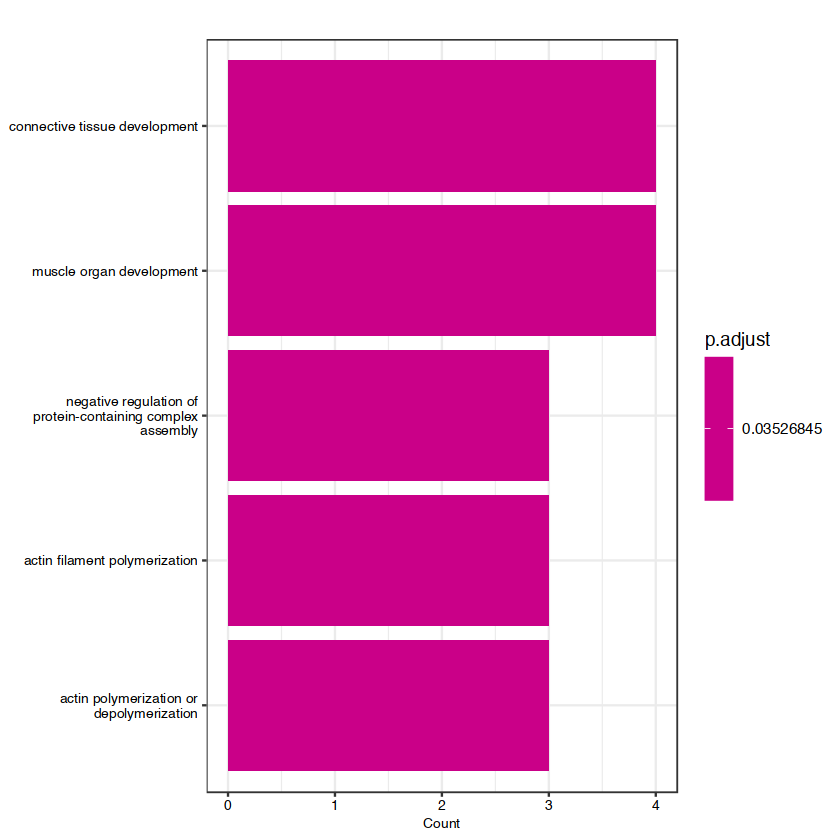

In [80]:
fit <- plot(barplot(GO_results, showCategory = 5, font.size=8))
png("figures/cluster3_DEG_Nfix_BP.png", res = 600, width = 2400, height = 1800)
print(fit)
dev.off()

In [65]:
#BP MF CC
GO_results <- enrichGO(gene = NFIX.hist.down$gene, 
                       OrgDb = "org.Mm.eg.db", keyType = "SYMBOL", ont = "BP")

In [66]:
as.data.frame(GO_results)

ID        
GO:0006338 GO:0006338
GO:0006305 GO:0006305
GO:0006306 GO:0006306
GO:0040029 GO:0040029
GO:0044728 GO:0044728
GO:0006304 GO:0006304
GO:0031507 GO:0031507
GO:0045814 GO:0045814
GO:0070828 GO:0070828
GO:0043414 GO:0043414
GO:0034728 GO:0034728
GO:0032259 GO:0032259
GO:0001667 GO:0001667
GO:0016570 GO:0016570
GO:2001020 GO:2001020
GO:0051222 GO:0051222
GO:0043588 GO:0043588
GO:0035904 GO:0035904
GO:0051054 GO:0051054
GO:1904951 GO:1904951
GO:0021781 GO:0021781
GO:0006334 GO:0006334
GO:0060976 GO:0060976
GO:0006337 GO:0006337
GO:0045661 GO:0045661
GO:2000736 GO:2000736
GO:0032986 GO:0032986
GO:0071514 GO:0071514
GO:0040014 GO:0040014
GO:0071824 GO:0071824
⋮          ⋮         
GO:0048638 GO:0048638
GO:0019076 GO:0019076
GO:0035891 GO:0035891
GO:0097284 GO:0097284
GO:0071692 GO:0071692
GO:0033044 GO:0033044
GO:0001654 GO:0001654
GO:0150063 GO:0150063
GO:0048880 GO:0048880
GO:0003338 GO:0003338
GO:0060840 GO:0060840
GO:0042692 GO:0042692
GO:0010586 GO:0010586
GO:0016055 GO:0016055
GO:0198738 GO:0198738
GO:2000738 GO:2000738
GO:2000819 GO:2000819
GO:0045445 GO:0045445
GO:0044030 GO:0044030
GO:0045943 GO:0045943
GO:0003279 GO:0003279
GO:2000779 GO:2000779
GO:1903829 GO:1903829
GO:0002063 GO:0002063
GO:0140718 GO:0140718
GO:0060537 GO:0060537
GO:0001889 GO:0001889
GO:0070316 GO:0070316
GO:0061008 GO:0061008
GO:0045023 GO:0045023
           Description                                                 
GO:0006338 chromatin remodeling                                        
GO:0006305 DNA alkylation                                              
GO:0006306 DNA methylation                                             
GO:0040029 epigenetic regulation of gene expression                    
GO:0044728 DNA methylation or demethylation                            
GO:0006304 DNA modification                                            
GO:0031507 heterochromatin formation                                   
GO:0045814 negative regulation of gene expression, epigenetic          
GO:0070828 heterochromatin organization                                
GO:0043414 macromolecule methylation                                   
GO:0034728 nucleosome organization                                     
GO:0032259 methylation                                                 
GO:0001667 ameboidal-type cell migration                               
GO:0016570 histone modification                                        
GO:2001020 regulation of response to DNA damage stimulus               
GO:0051222 positive regulation of protein transport                    
GO:0043588 skin development                                            
GO:0035904 aorta development                                           
GO:0051054 positive regulation of DNA metabolic process                
GO:1904951 positive regulation of establishment of protein localization
GO:0021781 glial cell fate commitment                                  
GO:0006334 nucleosome assembly                                         
GO:0060976 coronary vasculature development                            
GO:0006337 nucleosome disassembly                                      
GO:0045661 regulation of myoblast differentiation                      
GO:2000736 regulation of stem cell differentiation                     
GO:0032986 protein-DNA complex disassembly                             
GO:0071514 genomic imprinting                                          
GO:0040014 regulation of multicellular organism growth                 
GO:0071824 protein-DNA complex subunit organization                    
⋮          ⋮                                                           
GO:0048638 regulation of developmental growth                          
GO:0019076 viral release from host cell                                
GO:0035891 exit from host cell                                         
GO:0097284 hepatocyte apoptotic process                                
GO:0071692 protein localization to extracellular region

pdf 
  2

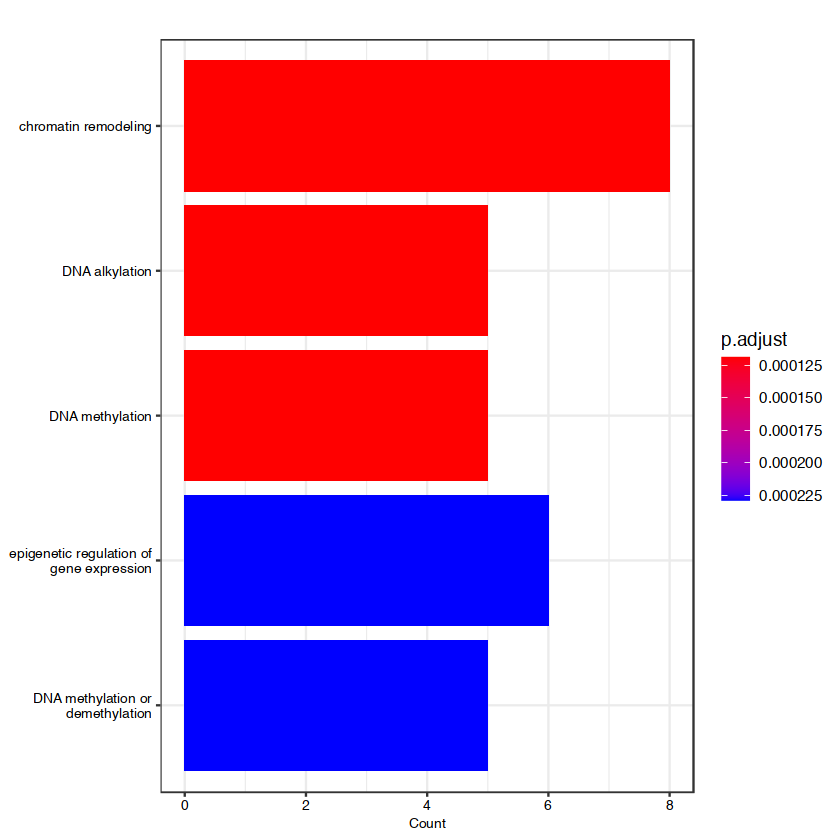

In [67]:
fit <- plot(barplot(GO_results, showCategory = 5, font.size=8))
png("figures/cluster3_DEG_Nfix_BP.png", res = 600, width = 2400, height = 1800)
print(fit)
dev.off()

<h1>VennDiagram</h1>

In [68]:
library(VennDiagram)
library(tidyverse)

Loading required package: futile.logger

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ purrr     1.0.1
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%--%()      masks igraph::%--%()
✖ lubridate::%within%()  masks IRanges::%within%()
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ dplyr::collapse()      masks Biostrings::collapse(), IRanges::collapse()
✖ dplyr::combine()       masks Biobase::combine(), BiocGenerics::combine()
✖ purrr::compact()       masks XVector::compact()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::desc()          masks IRanges::desc()
✖ tidyr::expand()        masks S4Vectors::expand()
✖ dplyr::filter()        masks clusterProfiler::filter(), stats

In [69]:
# Generate 3 sets of 200 words
set1 <- cluste2_3.DEG$gene
set2 <- NFIX.hist$gene
#set3 <- NFIX.hist$gene
 
# Chart
venn.diagram(
  x = list(set1, set2),
  category.names = c("Cluster 2 vs 3" , "Nfix hits"),
  filename = 'figures/cluster2vs3_DEG_Venn.png',
   output = TRUE ,
          imagetype="png" ,
          height = 480 , 
          width = 480 , 
          resolution = 600,
          compression = "lzw",
          lwd = 1,
          col=c("#440154ff", '#21908dff'),
          fill = c(alpha("#440154ff",0.3), alpha('#21908dff',0.3)),
          cex = 0.5,
          fontfamily = "sans",
          cat.cex = 0.3,
          cat.default.pos = "outer",
          cat.pos = c(-27, 27),
          cat.dist = c(0.055, 0.055),
          cat.col = c("#440154ff", '#21908dff')
          
)

[1] 1

<h1>Network</h1>

In [70]:
targetGenes <- TF.hits[,c("gene","hits","TF")]
colnames(targetGenes) <- c("symbol","hits","TFsymbol")
targetGenes$TFsymbol <- str_to_title(targetGenes$TFsymbol)
head(targetGenes)

symbol hits TFsymbol
1 Clk3   2    Nfix    
2 Rbm15b 1    Nfix    
3 Dok4   8    Nfix    
4 Cygb   1    Nfix    
5 Ap1b1  2    Nfix    
6 Atp8a1 3    Nfix

In [71]:
head(cluste2_3.DEG.TF)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster dir gene  TF 
Nfix  1.458740e-21 0.9086529  0.946 0.255 6.323054e-17 3       up  Nfix  yes
Tcf21 3.075222e-16 1.0678166  0.935 0.520 1.332986e-11 3       up  Tcf21 yes
Mgp   1.256679e-15 1.3315153  0.774 0.235 5.447199e-11 3       up  Mgp   yes
Mylk  1.259059e-15 1.0922263  0.828 0.276 5.457518e-11 3       up  Mylk  yes
Ar    5.508236e-14 1.0455924  0.484 0.010 2.387600e-09 3       up  Ar    yes
Foxl2 1.480049e-13 0.9394269  0.495 0.020 6.415418e-09 3       up  Foxl2 yes

In [72]:
TFgenes <- cluste2_3.DEG.TF[ cluste2_3.DEG.TF$dir=="up",c("gene")]
TFgenes <- as.data.frame(TFgenes)
TFgenes$totalBS = "1"
colnames(TFgenes) = c("symbol","totalBS")
TFgenes

symbol  totalBS
1  Nfix    1      
2  Tcf21   1      
3  Mgp     1      
4  Mylk    1      
5  Ar      1      
6  Foxl2   1      
7  Creb3l1 1      
8  Nfia    1      
9  Zeb1    1      
10 Nr6a1   1      
11 Nid1    1      
12 Esr1    1      
13 Thra    1      
14 Sox5    1      
15 Junb    1      
16 Msrb3   1      
17 Tcf4    1      
18 Egr1    1

In [73]:
create.network.graph <- function(targetGenes,hits,TFgenes,title){
    
    #filter number of hits
    targetGenes <- targetGenes[targetGenes$hits>=hits,]
   
    if(nrow(targetGenes)>0){
        #print(targetGenes)
        rowNames = c(names(table(targetGenes$symbol)),names(table(targetGenes$TFsymbol)))
        rowNames = names(table(rowNames))
        # initialize
        TFBinding <- matrix(0, ncol = length( rowNames), nrow = length( rowNames))
        dim(TFBinding)
        row.names(TFBinding) = rowNames
        colnames(TFBinding) = rowNames

        #Rows transcription factors Columns Target genes
        for(i in 1:nrow(targetGenes)){
            TFBinding[targetGenes[i,]$TFsymbol, targetGenes[i,]$symbol ] <- targetGenes[i,]$hits

        }
        
        
        g <- graph.adjacency(
          TFBinding,
          mode="directed",
          weighted=TRUE,
          diag=FALSE
        )
        # Simplfy the adjacency object
        #g <- simplify(g, remove.multiple=TRUE, remove.loops=TRUE)

        # Colour negative correlation edges as blue
        E(g)[which(E(g)$weight<0)]$color <- "darkblue"

        # Colour positive correlation edges as red
        E(g)[which(E(g)$weight>0)]$color <- "darkred"

        # Convert edge weights to absolute values
        #E(g)$weight <- abs(E(g)$weight)

        # Change arrow size
        # For directed graphs only
        E(g)$arrow.size <- 0.3

        # Remove edges below absolute Pearson correlation 0.8
        #g <- delete_edges(g, E(g)[which(E(g)$weight<0.8)])

        # Remove any vertices remaining that have no edges
        g <- delete.vertices(g, degree(g)==0)

        # Assign names to the graph vertices (optional)
        V(g)$name <- V(g)$name

        # Change shape of graph vertices
        V(g)$shape <- "sphere"

        # Change colour of graph vertices
        g_data <-  get.data.frame(g,  what="vertices")$name
        #print(g_data)
        V(g)$color <- ifelse(g_data %in% TFgenes$symbol,"blue","blue") 
        # Change colour of vertex frames
        V(g)$vertex.frame.color <- "white"

        # Scale the size of the vertices to be proportional to the level of expression of each gene represented by each vertex
        # Multiply scaled vales by a factor of 10
        #scale01 <- function(x){(x-min(x))/(max(x)-min(x))}
        #vSizes <- (scale01(apply(TFBinding, 1, mean)) + 1.0) * 10

        # Amplify or decrease the width of the edges
        edgeweights <- E(g)$weight * 2.0

        # Convert the graph adjacency object into a minimum spanning tree based on Prim's algorithm
        #mst <- mst(g, algorithm="prim")

        # Plot the tree object
        plot(
          g,
          layout=layout.fruchterman.reingold,
          edge.curved=FALSE,
          vertex.size=35,
          #vertex.label.dist=-0.5,
          vertex.label.color="white",
          asp=FALSE,
          #vertex.label.cex=1,
          edge.arrow.mode = E(g)$arrow,
          main=title)
   } 
}

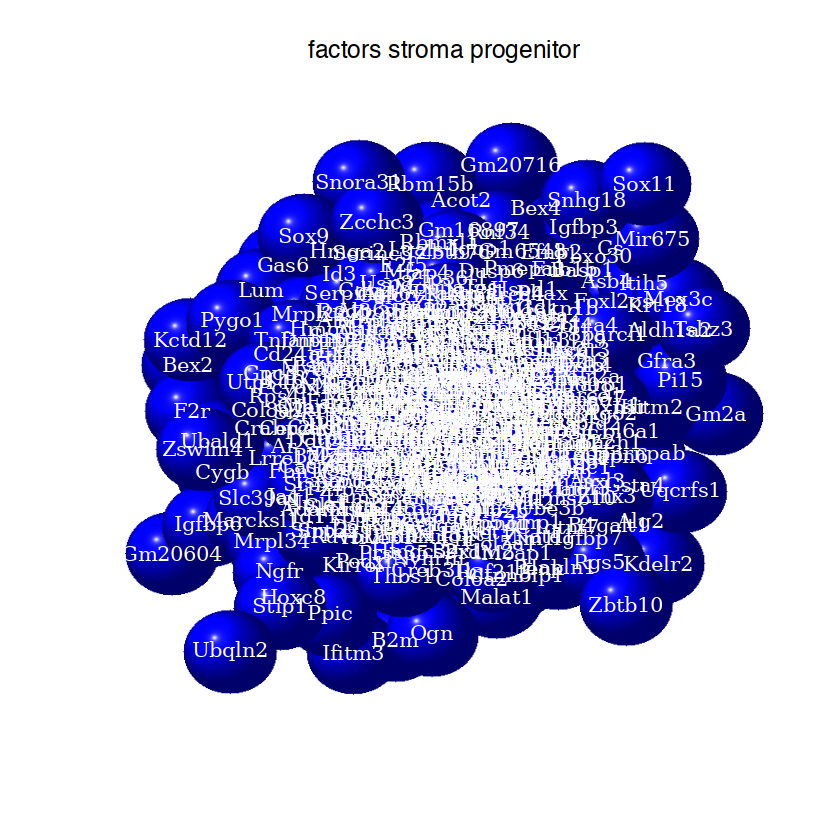

In [74]:
#Tcf21 and NFIX
#TFgenes = TFgenes[TFgenes$symbol %in% c("Tcf21","Nfix"),]
#targetGenes = targetGenes[targetGenes$symbol %in% TFgenes$symbol ,]
create.network.graph(targetGenes,hits=1,TFgenes,
                     title = paste("factors stroma progenitor"))

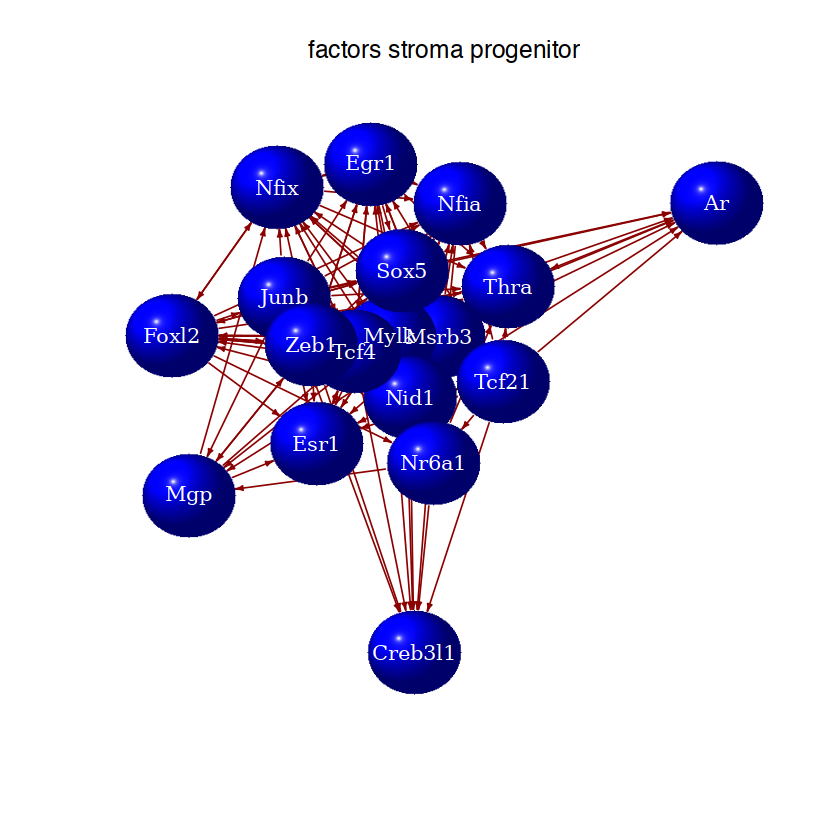

In [75]:
#Tcf21 and NFIX
#TFgenes = TFgenes[TFgenes$symbol %in% c("Tcf21","Nfix"),]
targetGenes2 = targetGenes[targetGenes$symbol %in% TFgenes$symbol ,]
create.network.graph(targetGenes2,hits=1,TFgenes,
                     title = paste("factors stroma progenitor"))